## Load data

In [1]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from model import *
from visual_functions import *
from sweep_configs import *
from sklearn.model_selection import train_test_split
from wandb.keras import WandbCallback
#from optimization import *
%matplotlib inline

## ---------------------- load data ----------------------------------------
train_dir = "./datasets/train/"
test_dir = "./datasets/test/"

k = 0
displays = np.load(train_dir + "X/X{}.npz".format(k), "r")['arr_0']
displays_test = np.load(test_dir + "X/X{}.npz".format(k), "r")['arr_0']
params = np.load(train_dir + "y/y{}.npz".format(k), "r")['arr_0']
params_test = np.load(test_dir + "y/y{}.npz".format(k), "r")['arr_0']

## Display data

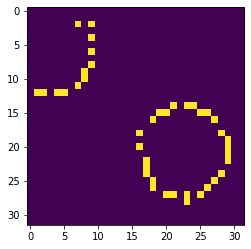

[ 5.58549798  2.58549798  7.41549798 20.98698837 22.98698837  6.81698837]


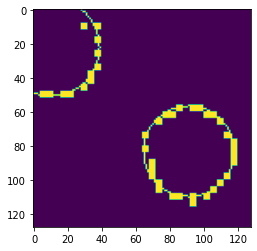

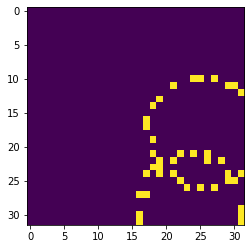

[18.63384592 25.63384592  8.46384592 29.41547827 24.41547827  8.24547827]


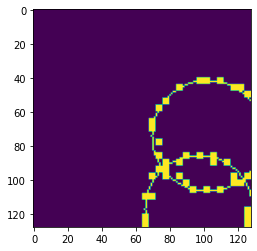

In [2]:
for i in range(2):
    plt.imshow(displays[i])
    plt.show()
    print(params[i])
    plt.imshow(plot_single_event(displays[i], params[i]))
    plt.show()

## First training attempts

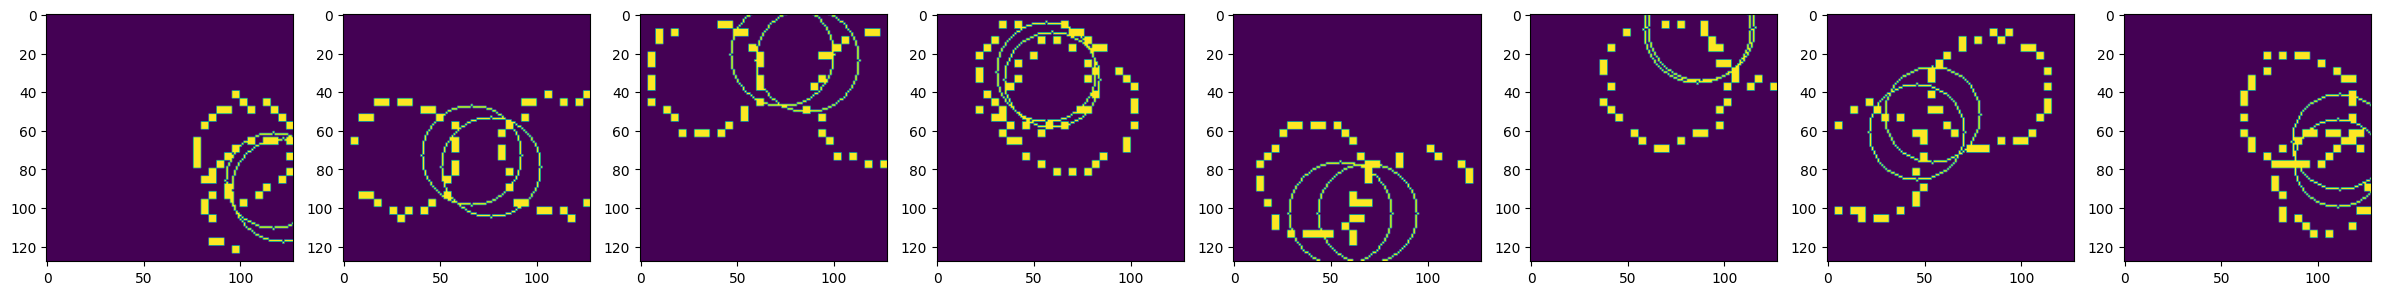

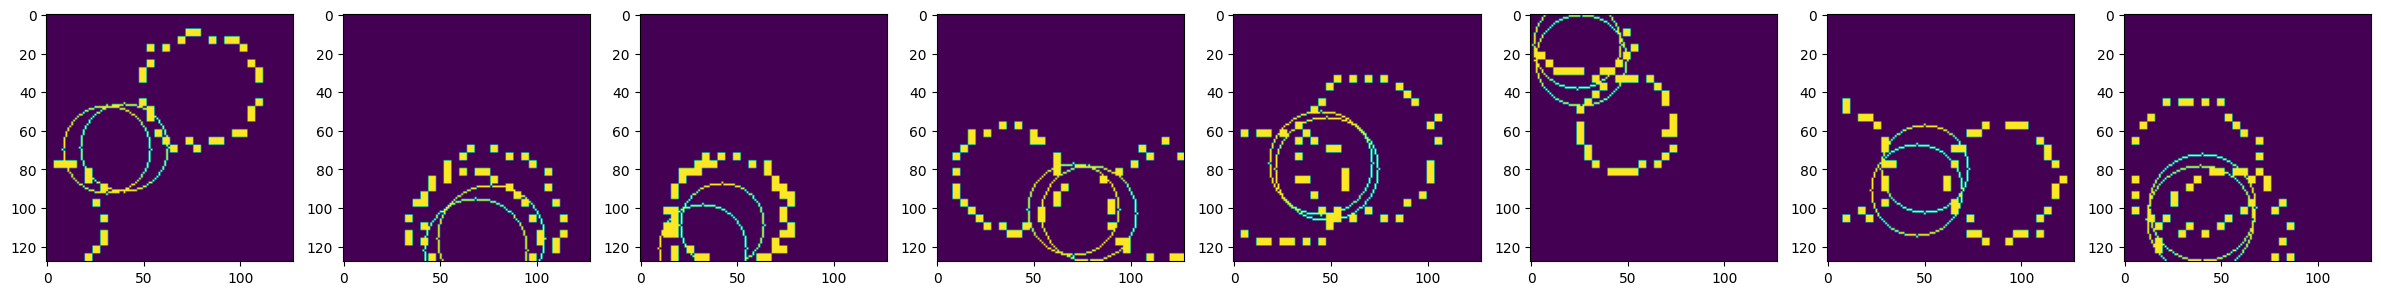

In [3]:
model = tf.keras.models.load_model("models/no_flipping_demonstration.model")
for i in range(2):
    compare_true_and_predict(displays_test, params_test, model, i, show_true=False)

## Swapping ring parameters

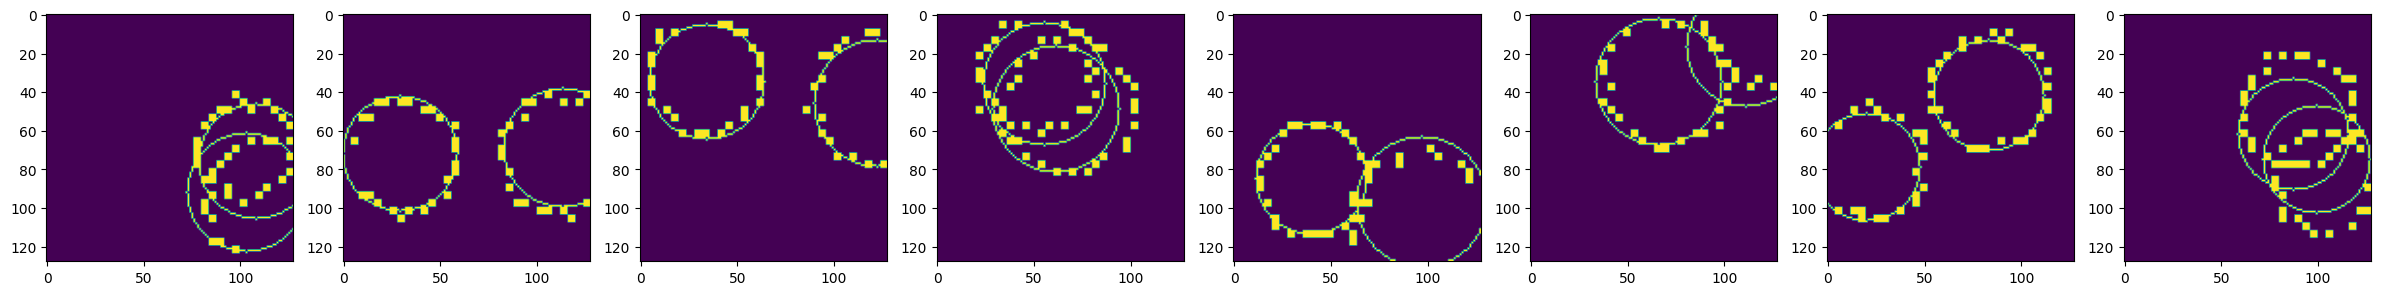

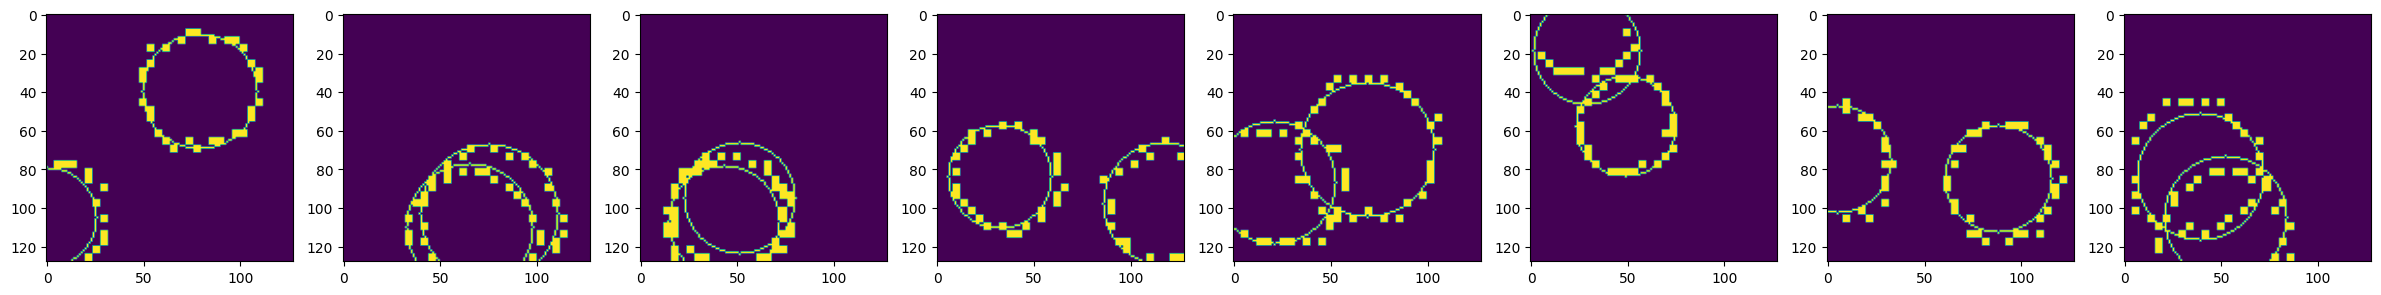

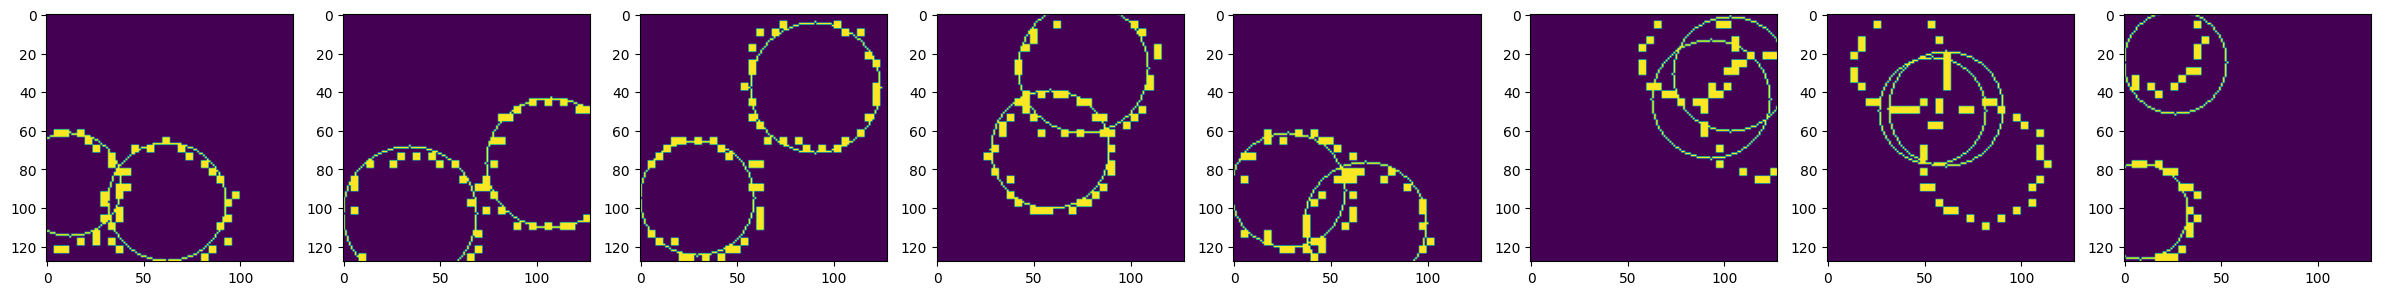

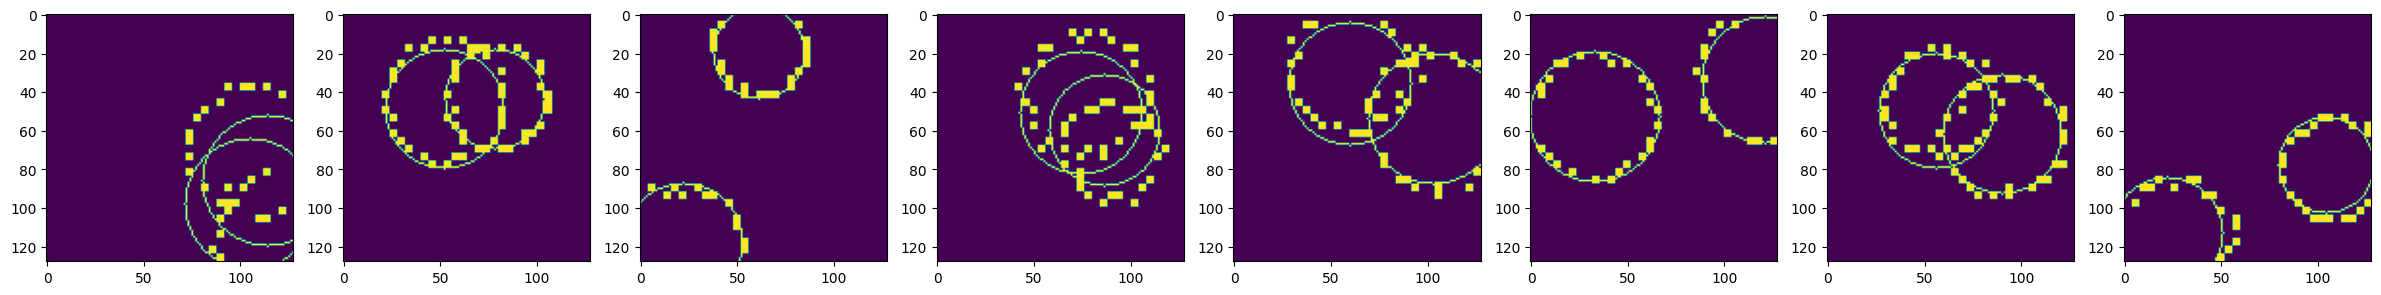

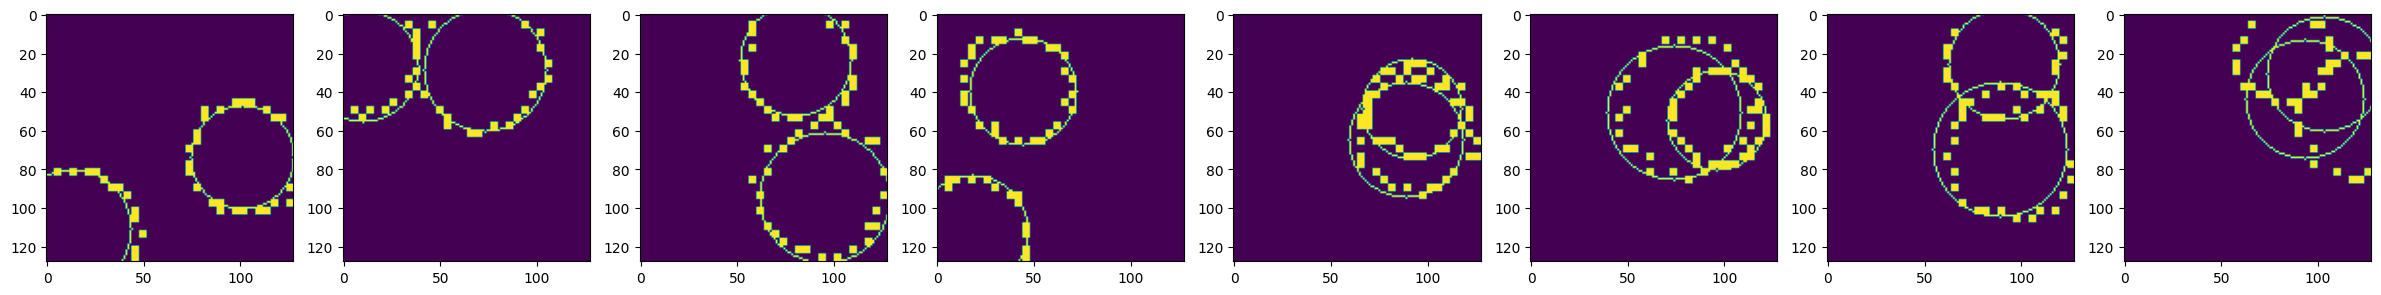

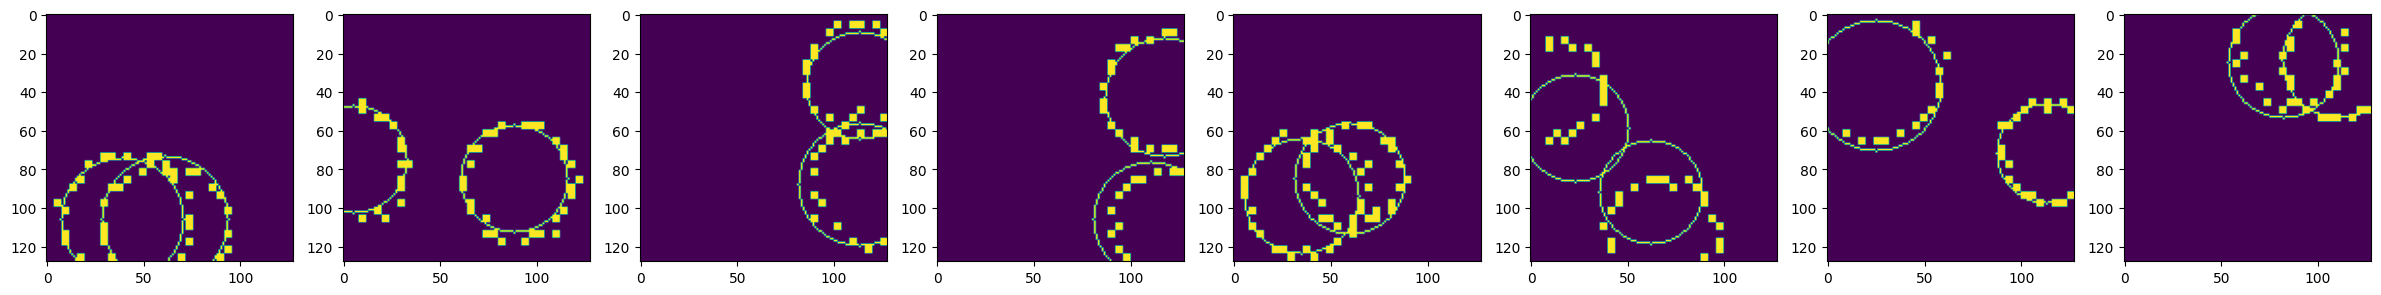

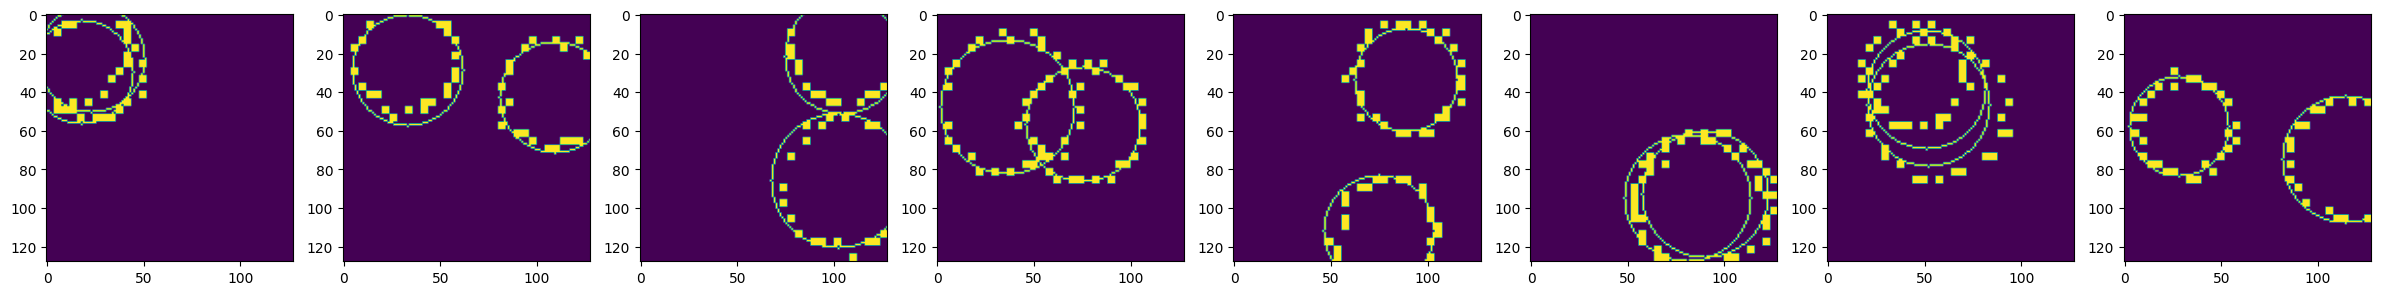

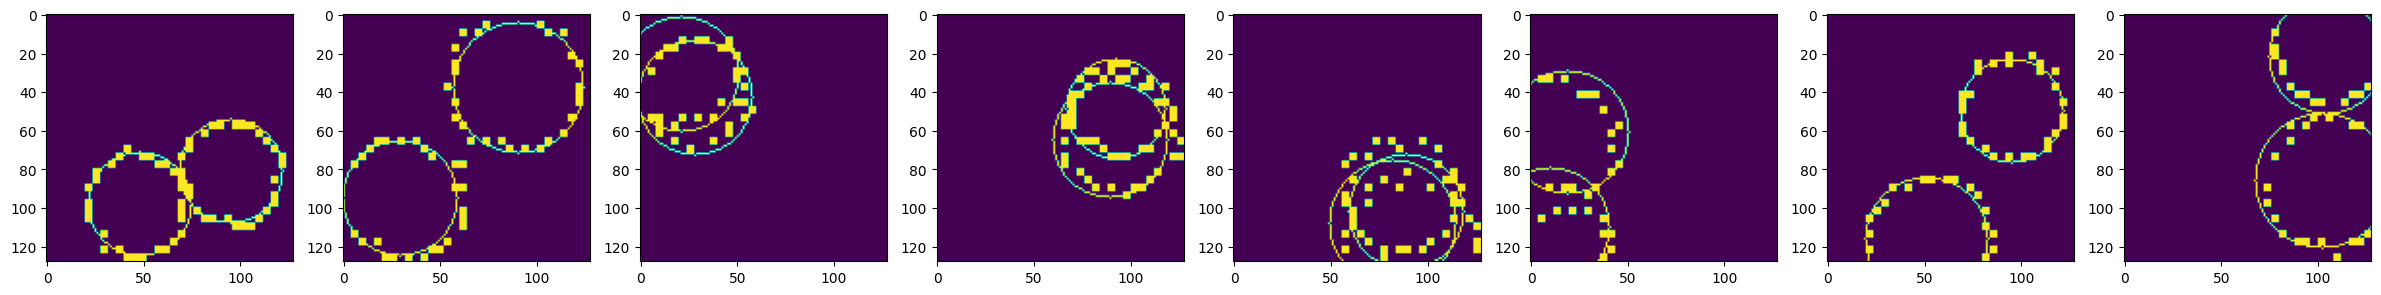

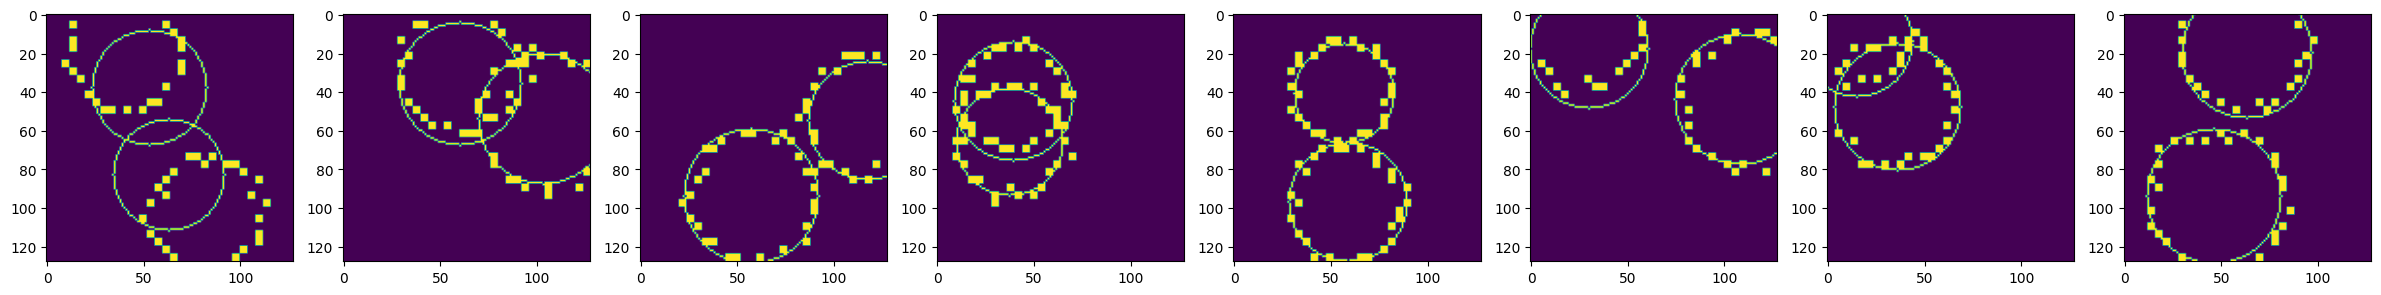

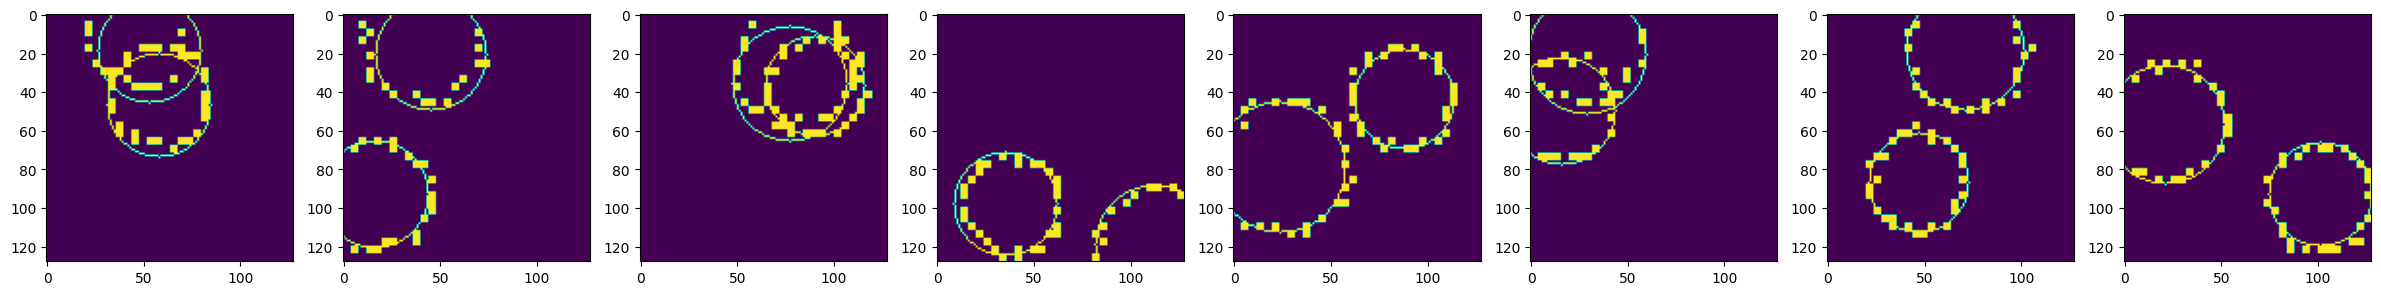

In [4]:
model = tf.keras.models.load_model("models/two_rings_32x3-CNN-params.model")
for i in range(10):
    compare_true_and_predict(displays_test, params_test, model, i, show_true=False)

## Added permutation for training with more than two rings

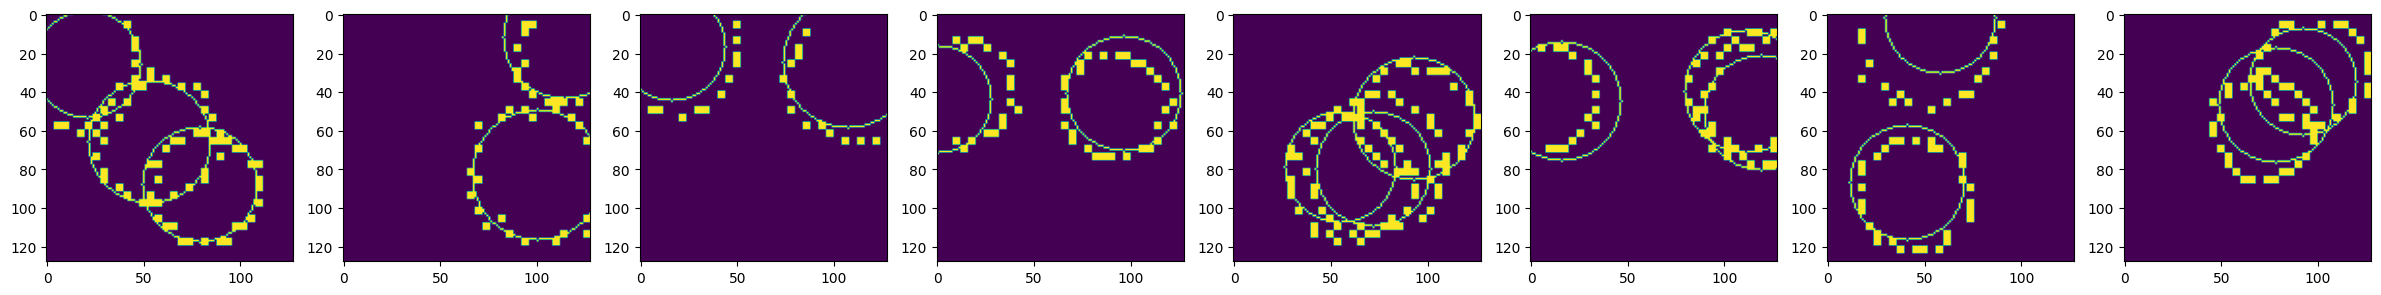

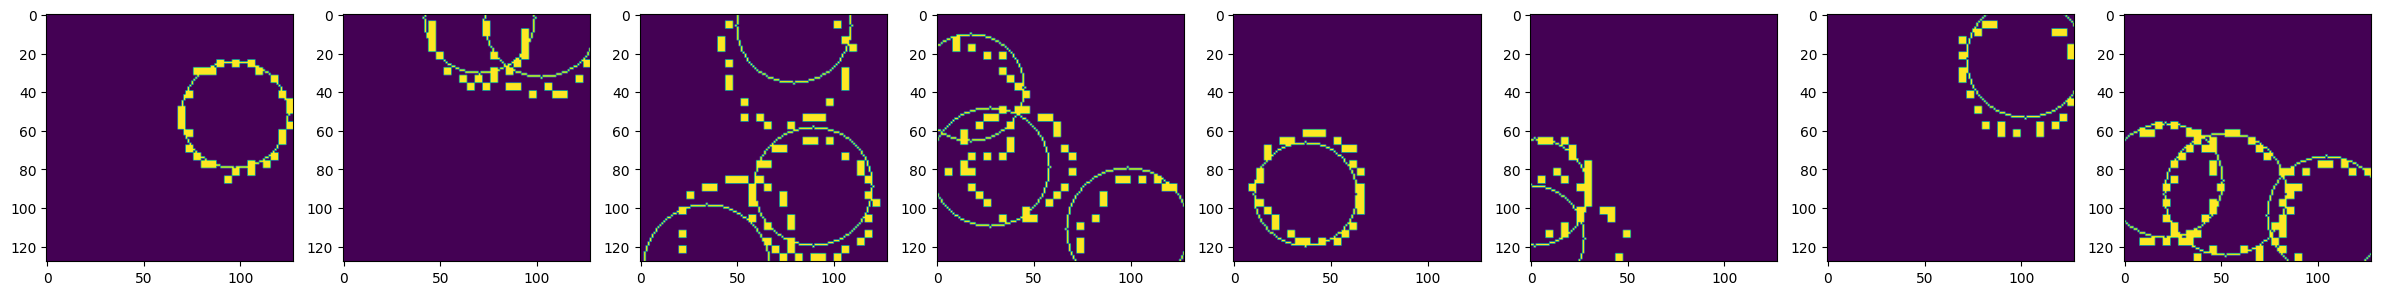

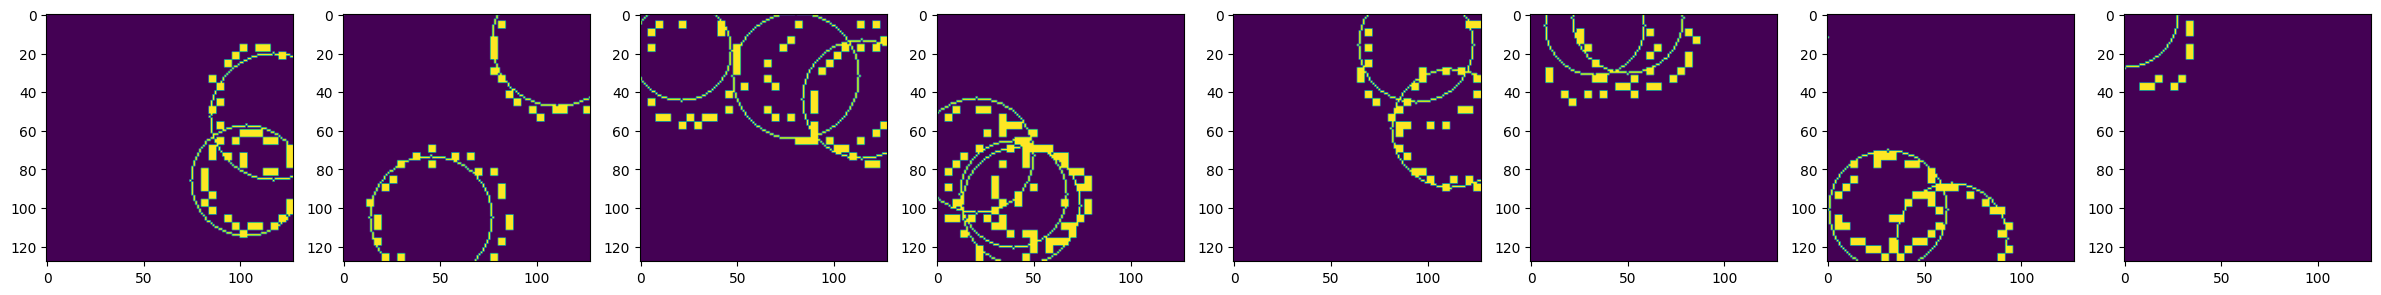

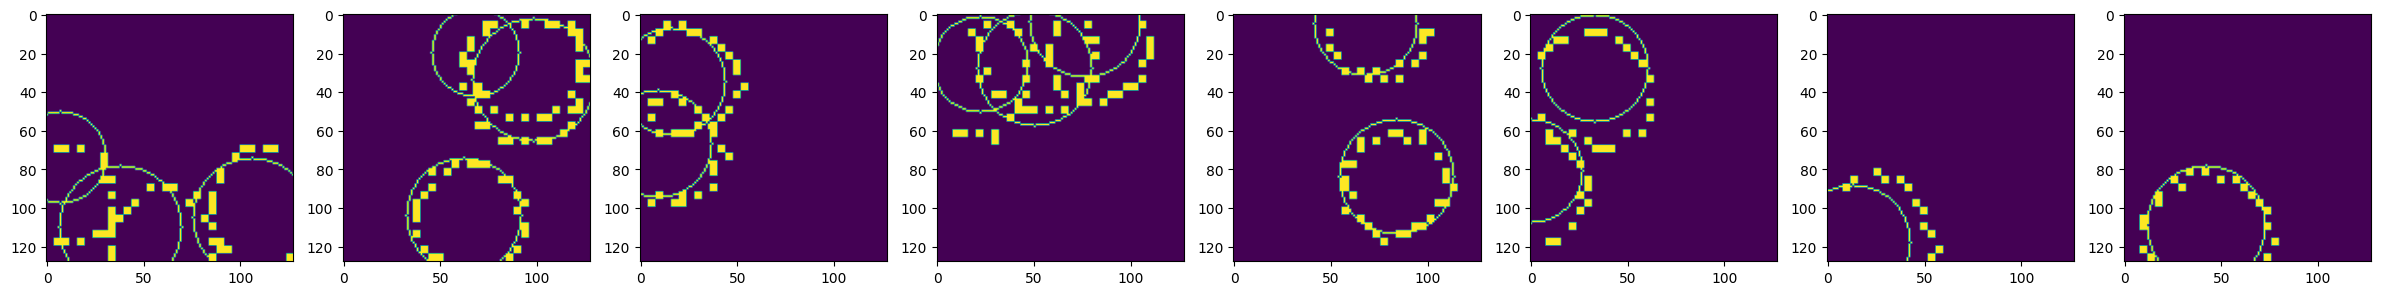

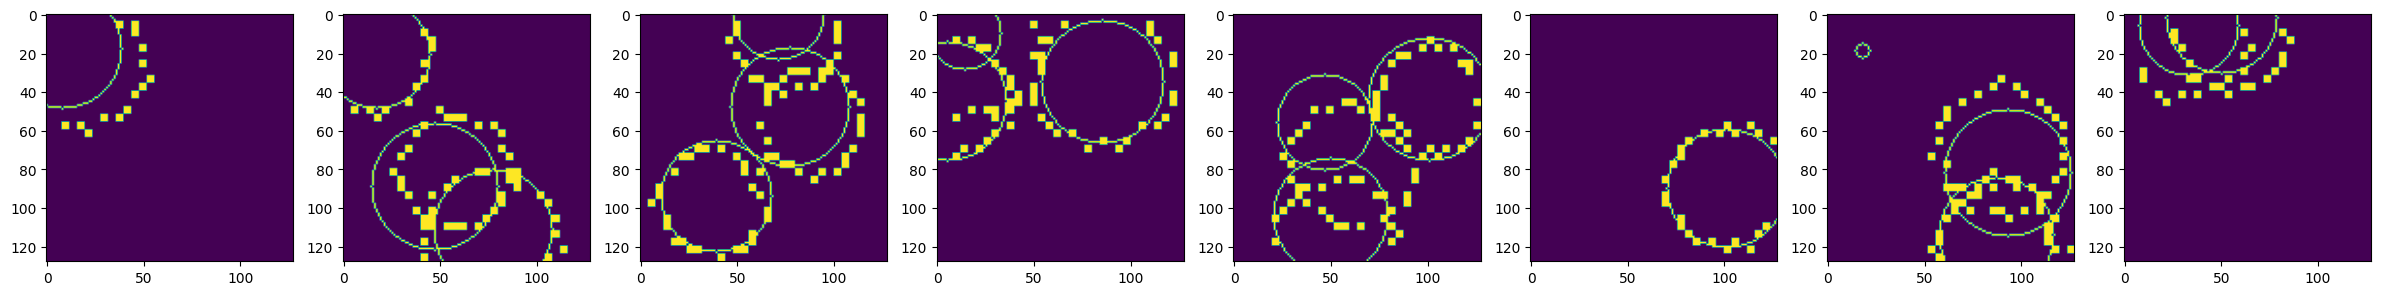

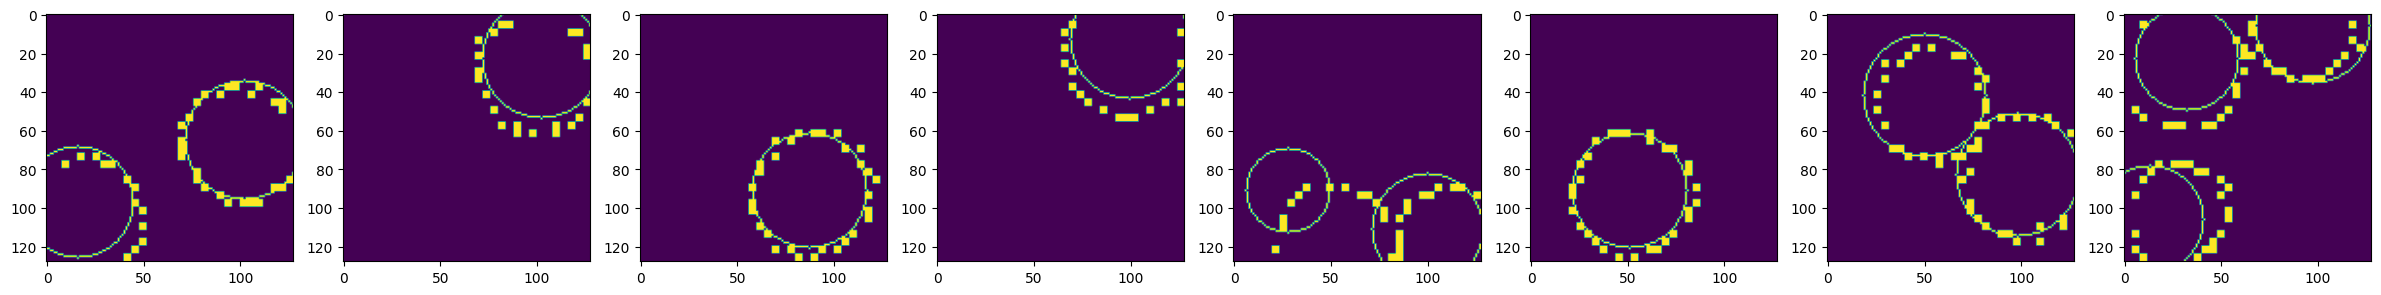

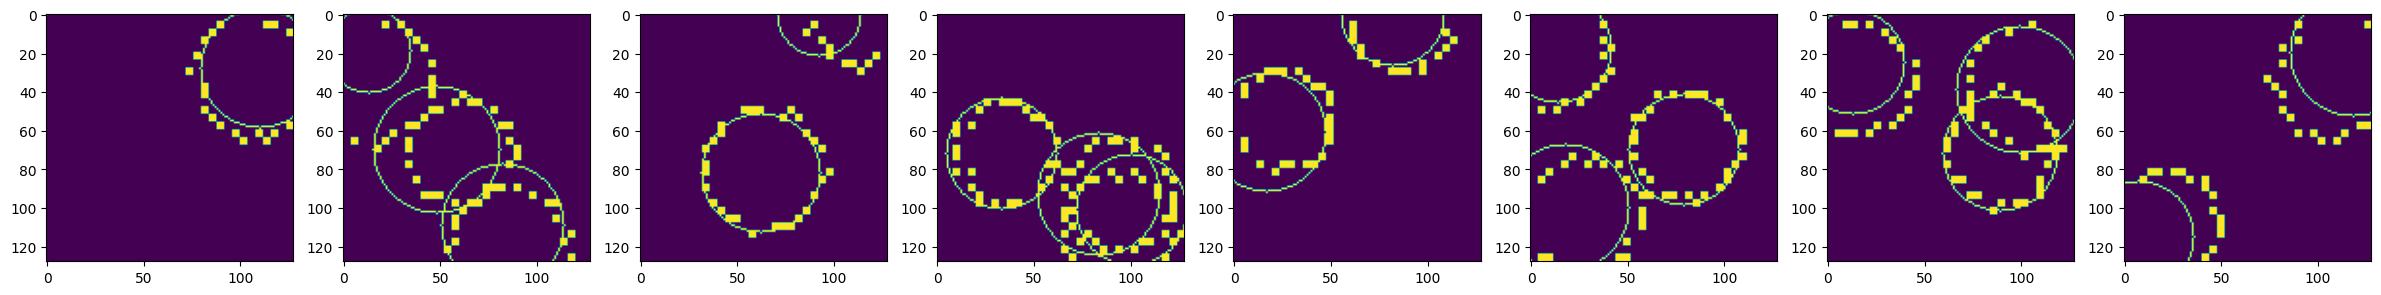

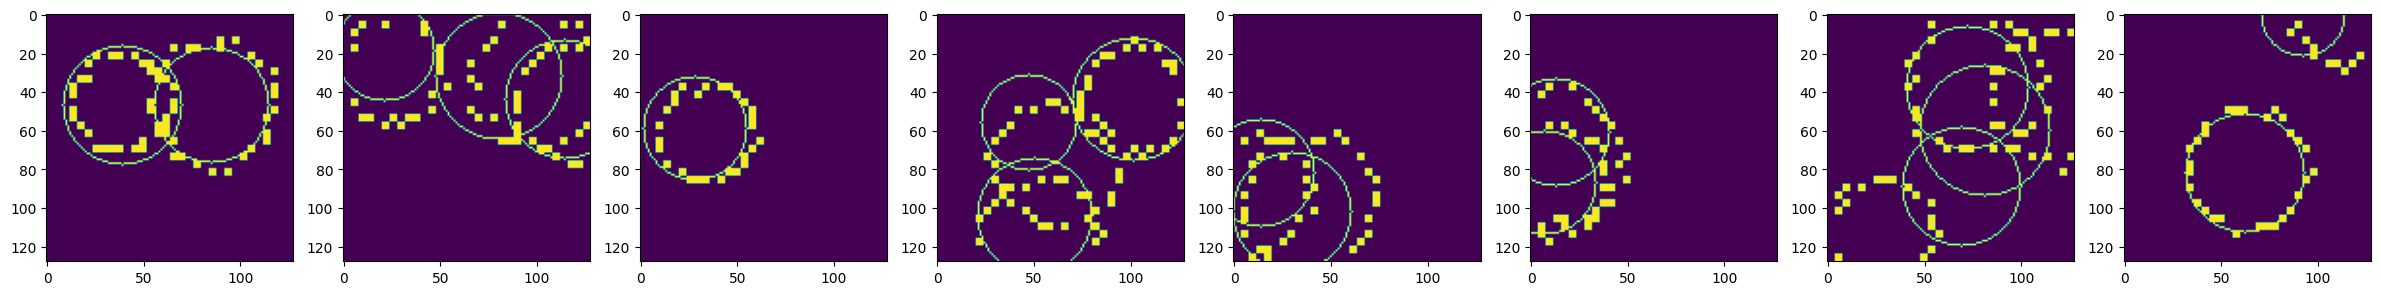

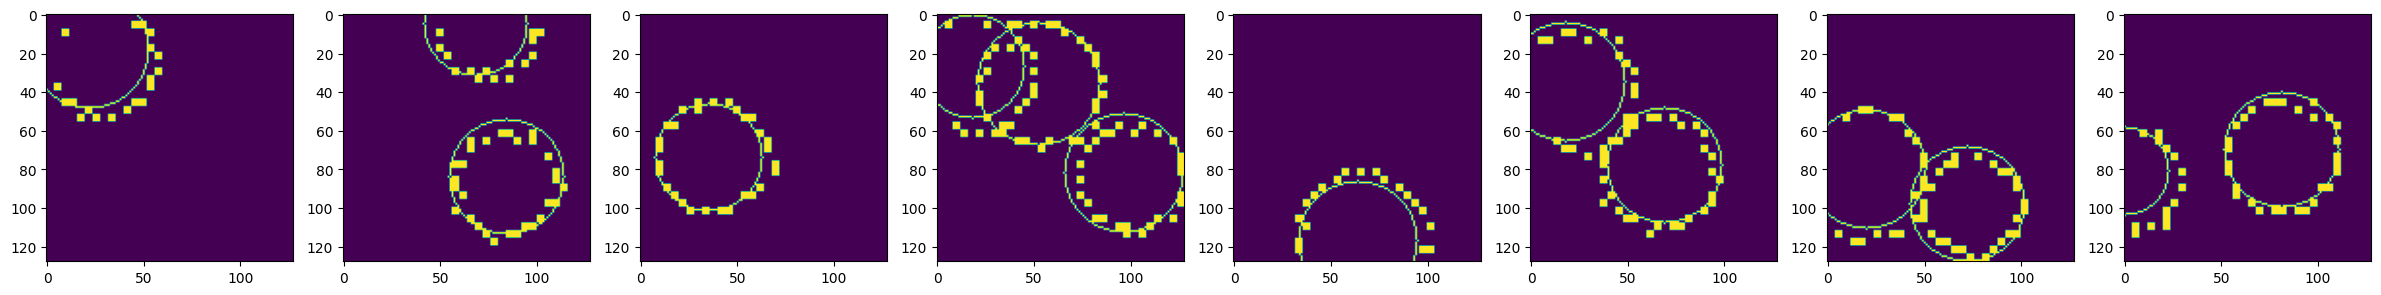

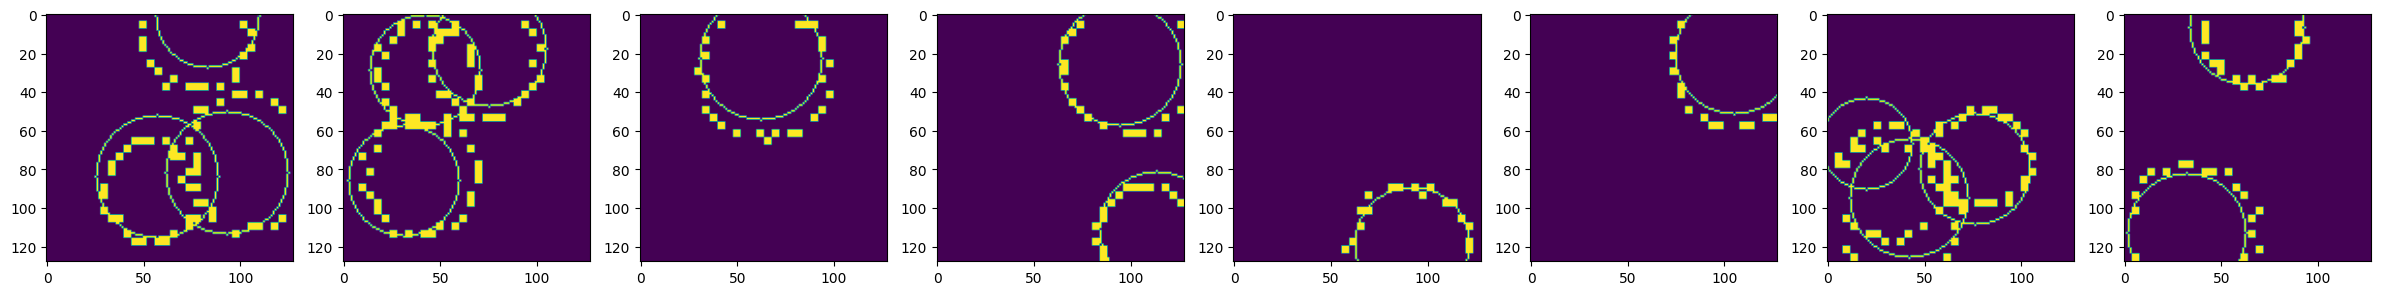

In [2]:
model = tf.keras.models.load_model("models/1-3_rings_32x2-CNN-params.model")
for i in range(10):
    compare_true_and_predict(displays_test, params_test, model, i, show_true=False)

In [3]:
from time import time
t1 = time()
model.predict(displays_test)
print(time() - t1)

0.24249720573425293


## Include ellipses

[15.5  8.5  9.   8.  35.   9.5 13.5  7.   7.   0.  25.5 14.5  7.   7.
  0. ]


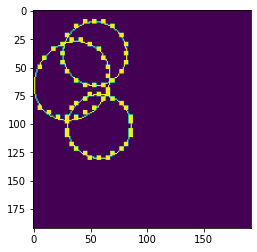

[40.5 41.5  8.   9.  57.  15.5  9.5  7.   8.  12.   0.   0.   0.   0.
  0. ]


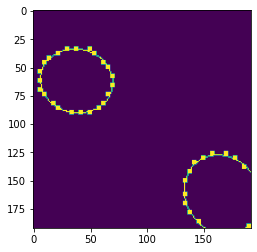

[18.5 18.5  7.   7.   0.  11.5 10.5  9.  10.  56.  22.5 10.5  8.   8.
  0. ]


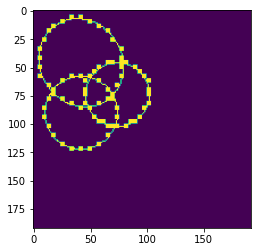

In [6]:
for i in range(3):
    print(params[i])
    plt.imshow(plot_single_event(displays[i], params[i]))
    plt.show()

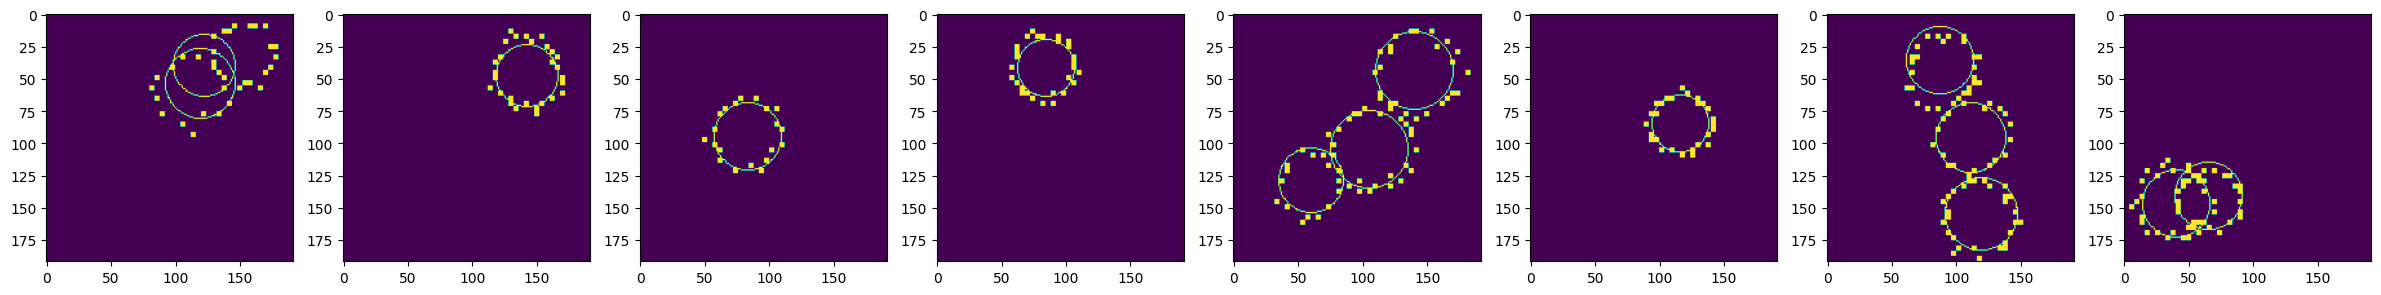

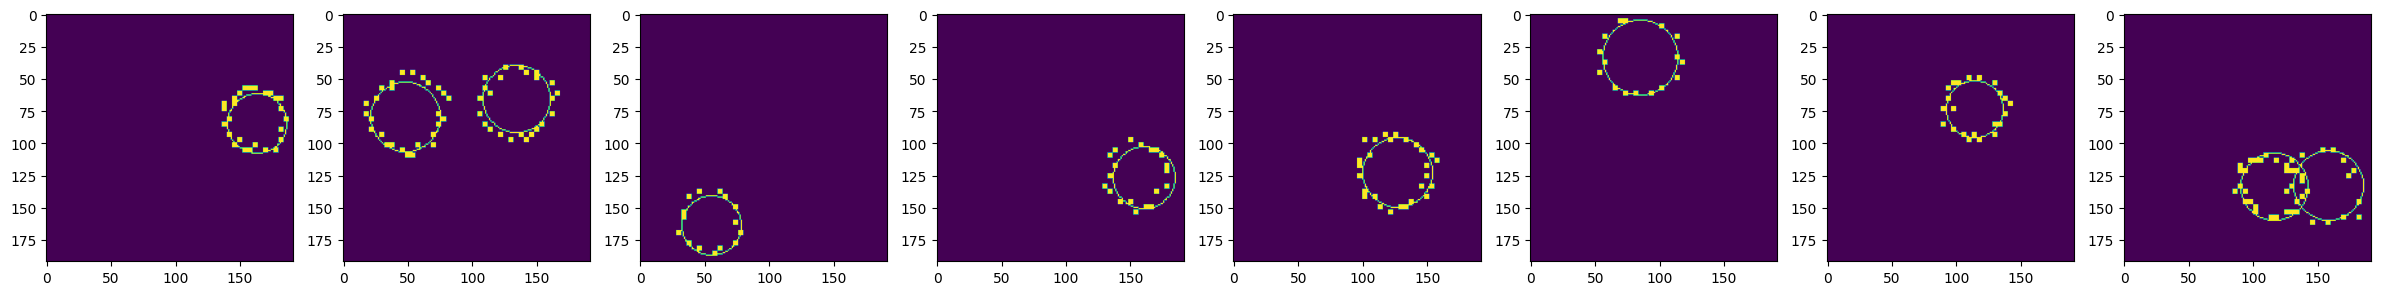

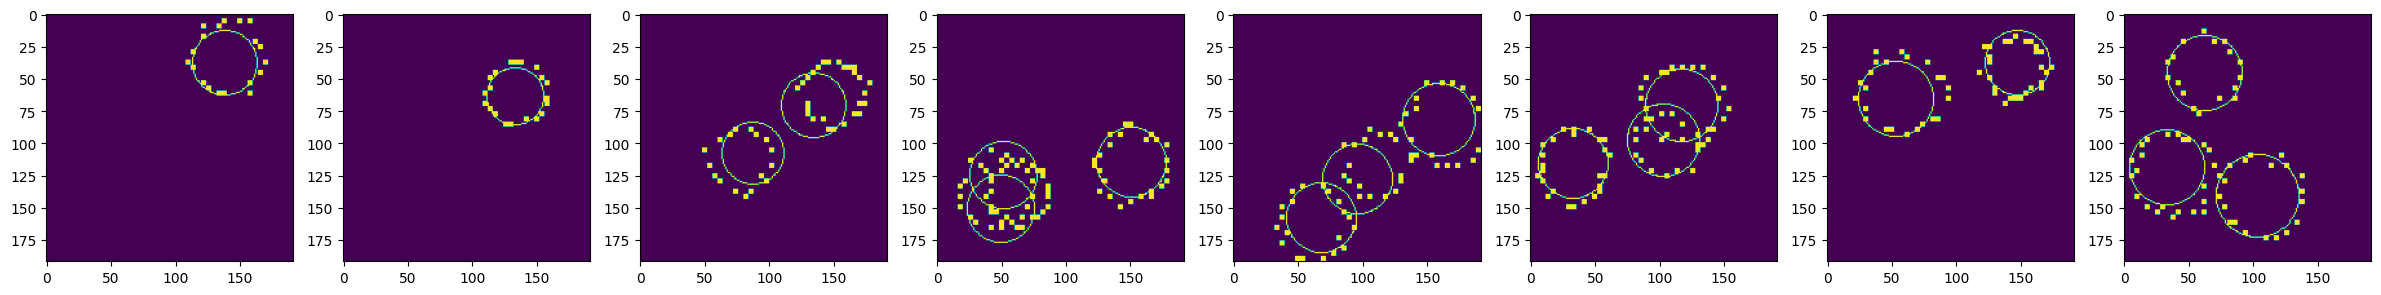

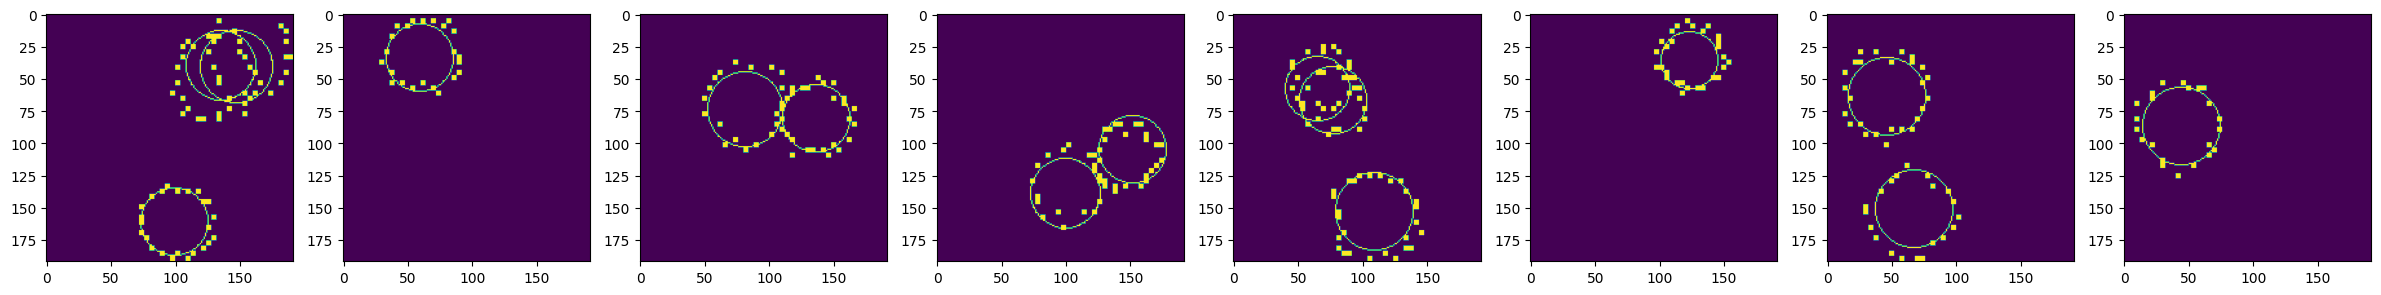

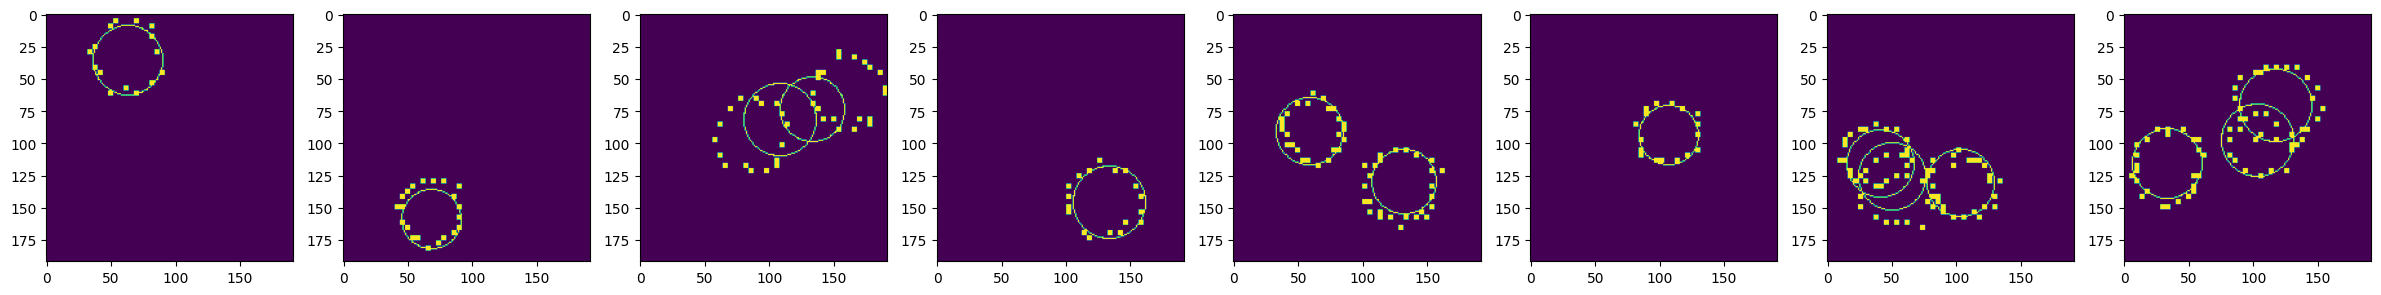

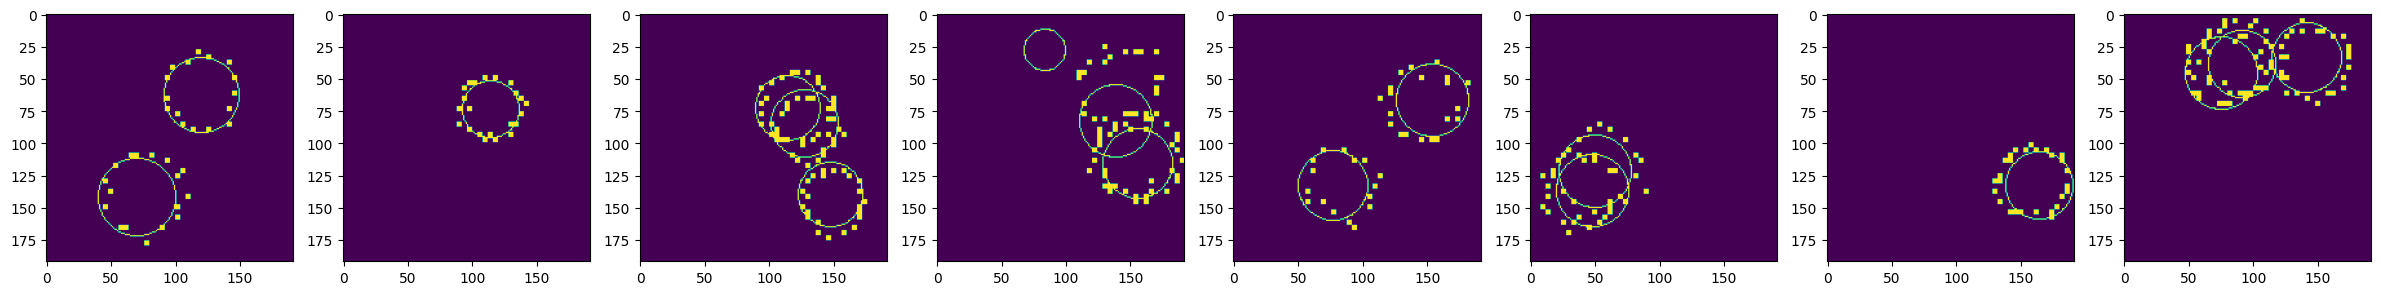

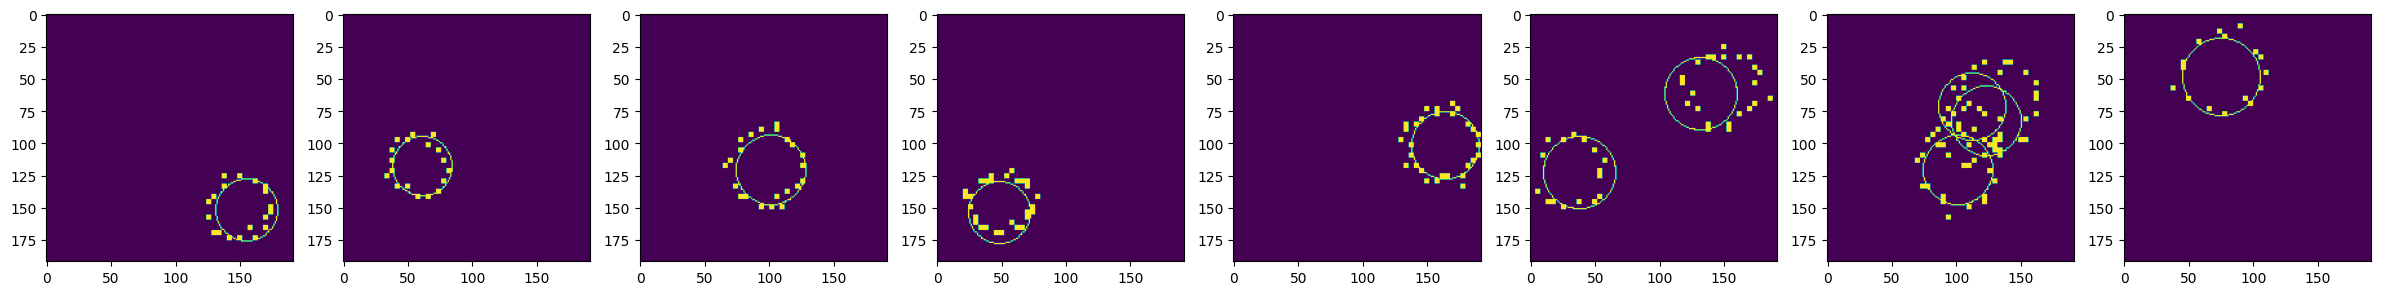

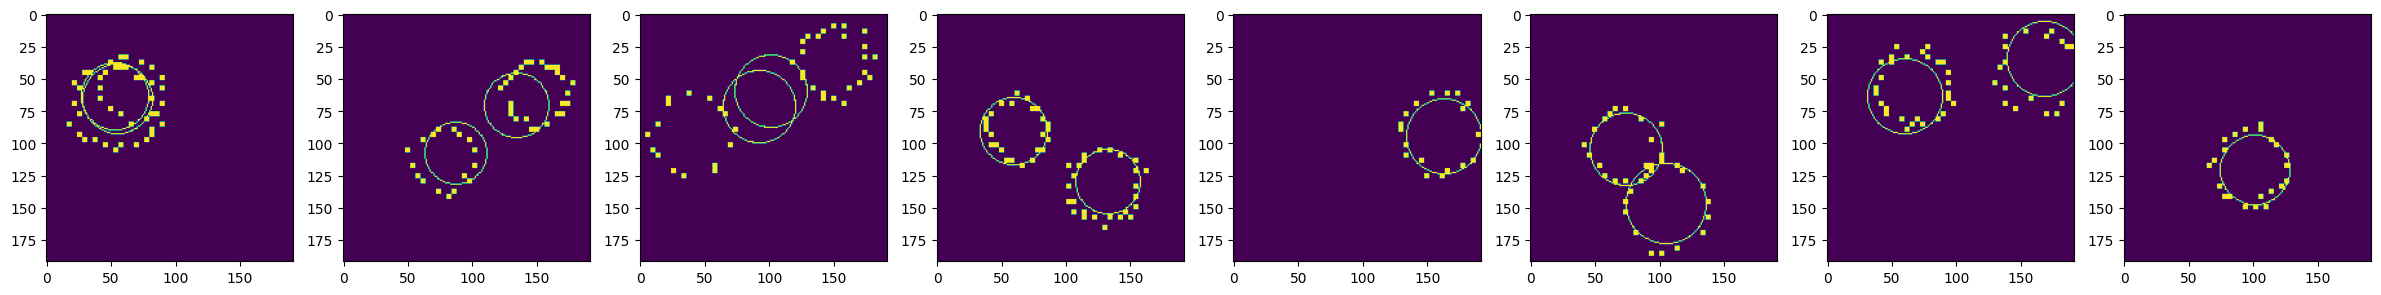

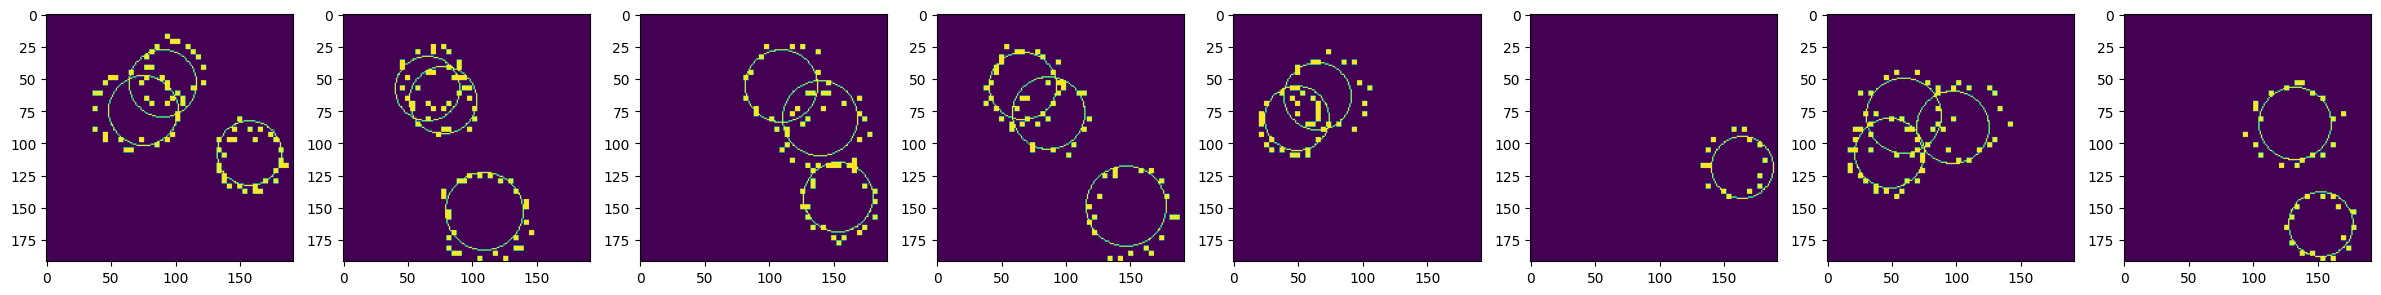

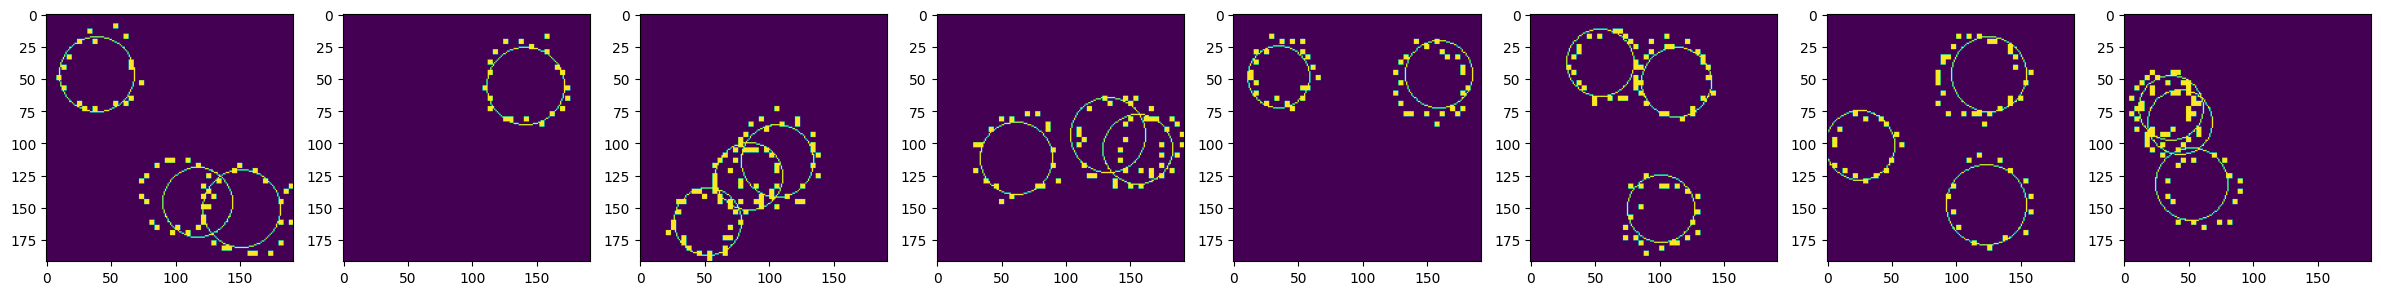

In [2]:
model = tf.keras.models.load_model("models/32x2-CNN.model")
for i in range(10):
    compare_true_and_predict(displays_test, params_test, model, i, show_true=False)

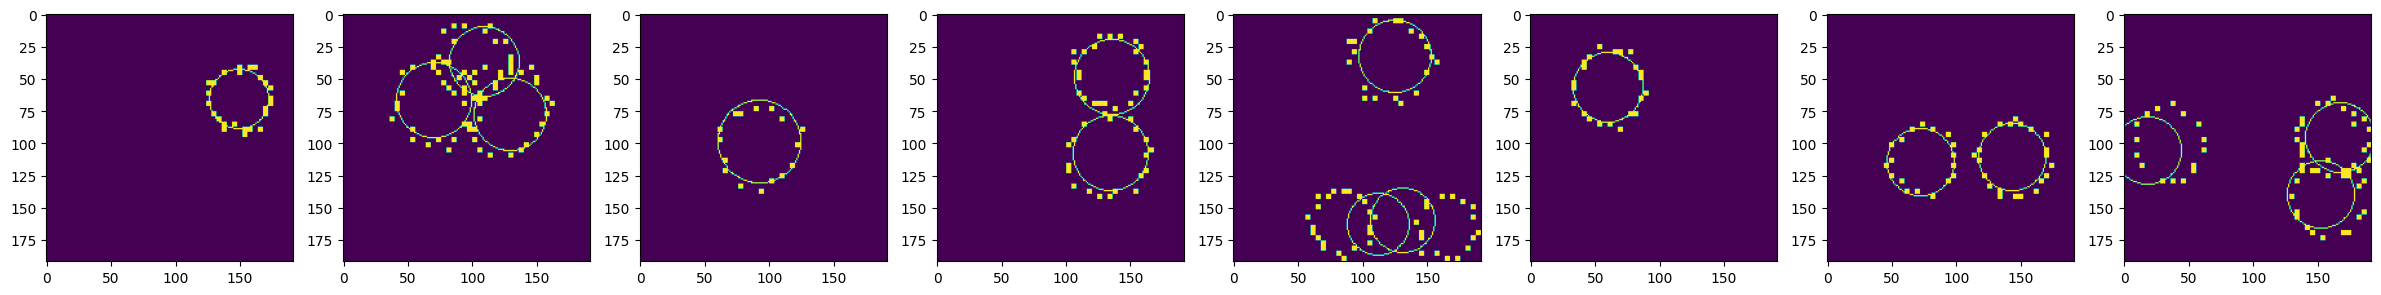

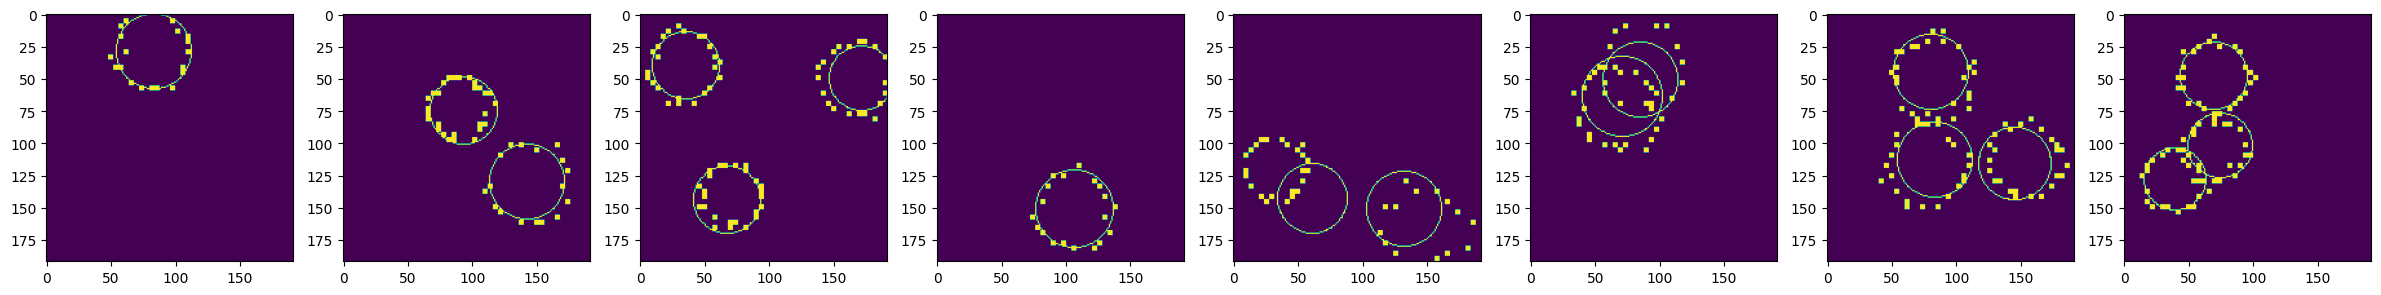

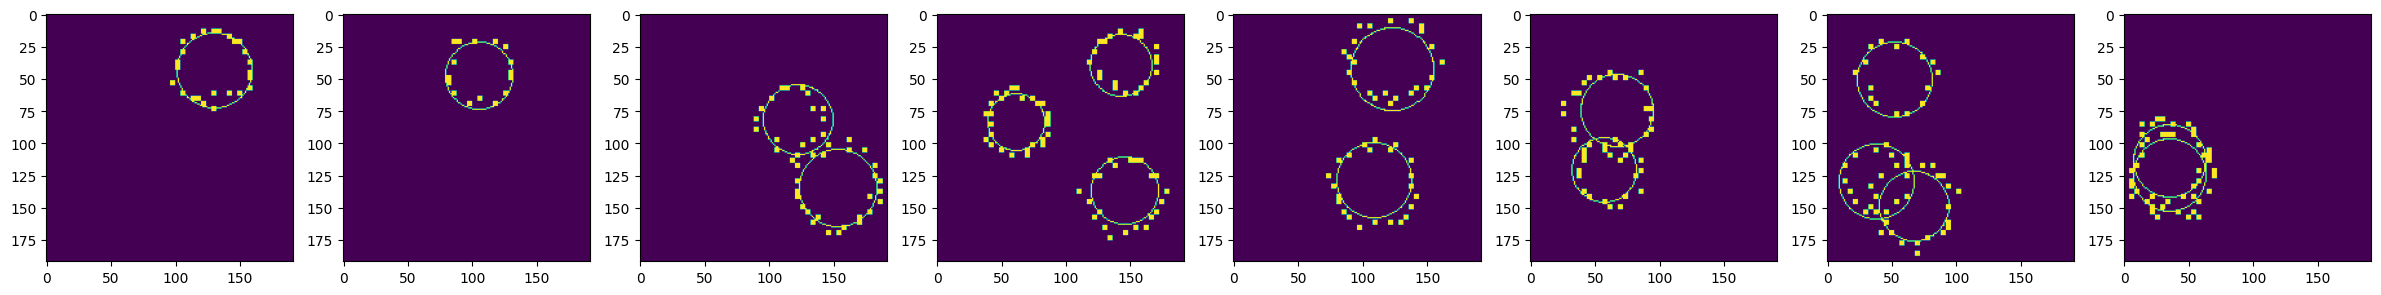

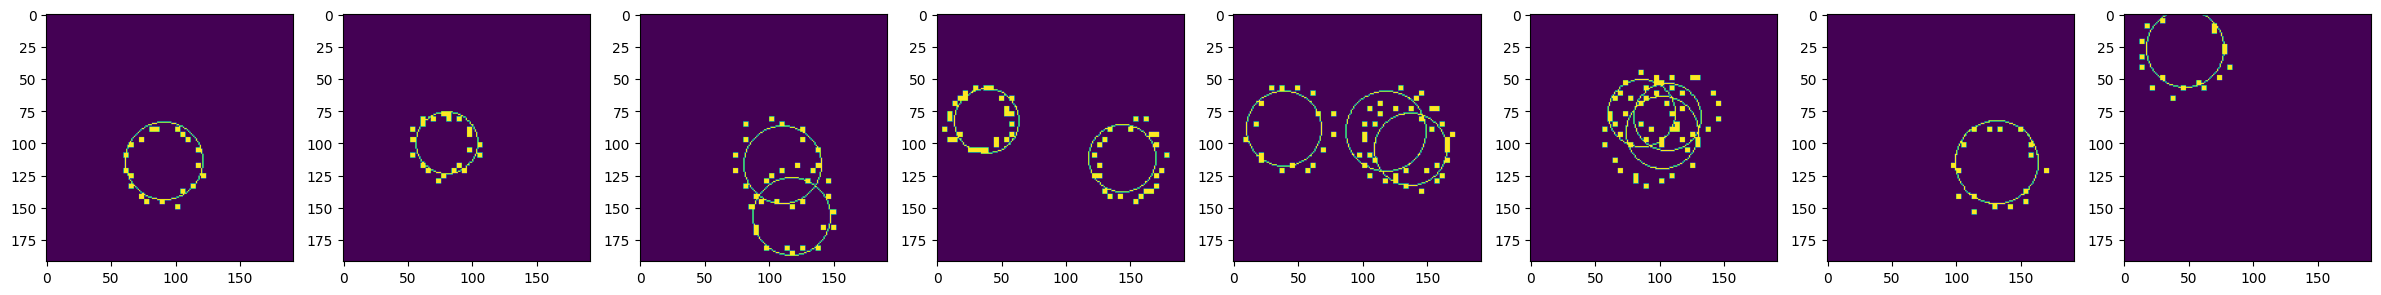

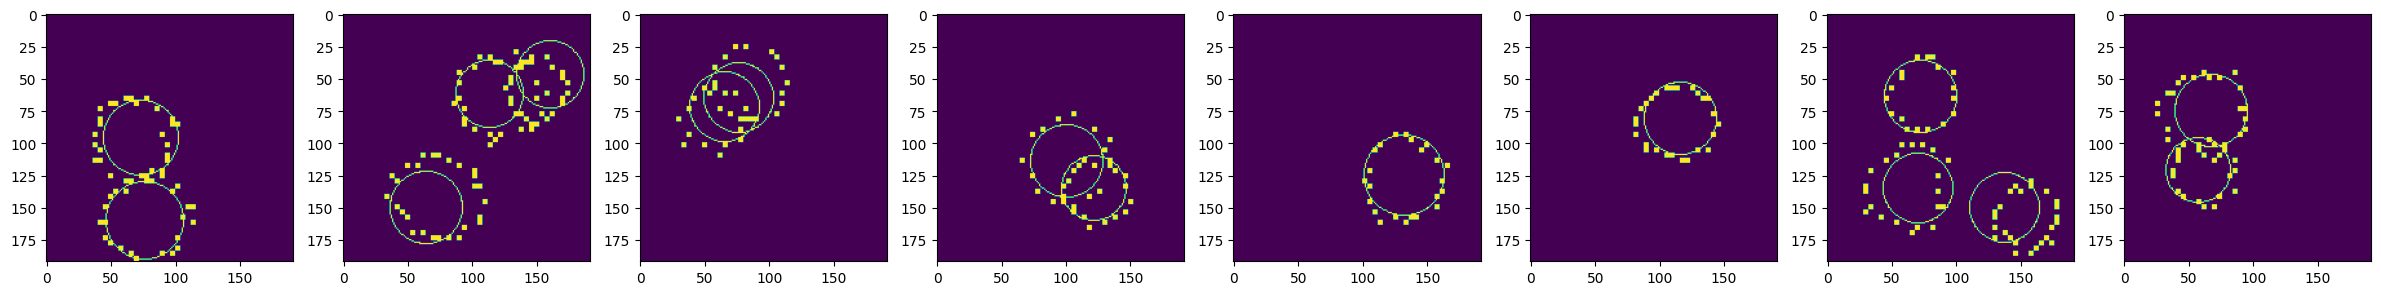

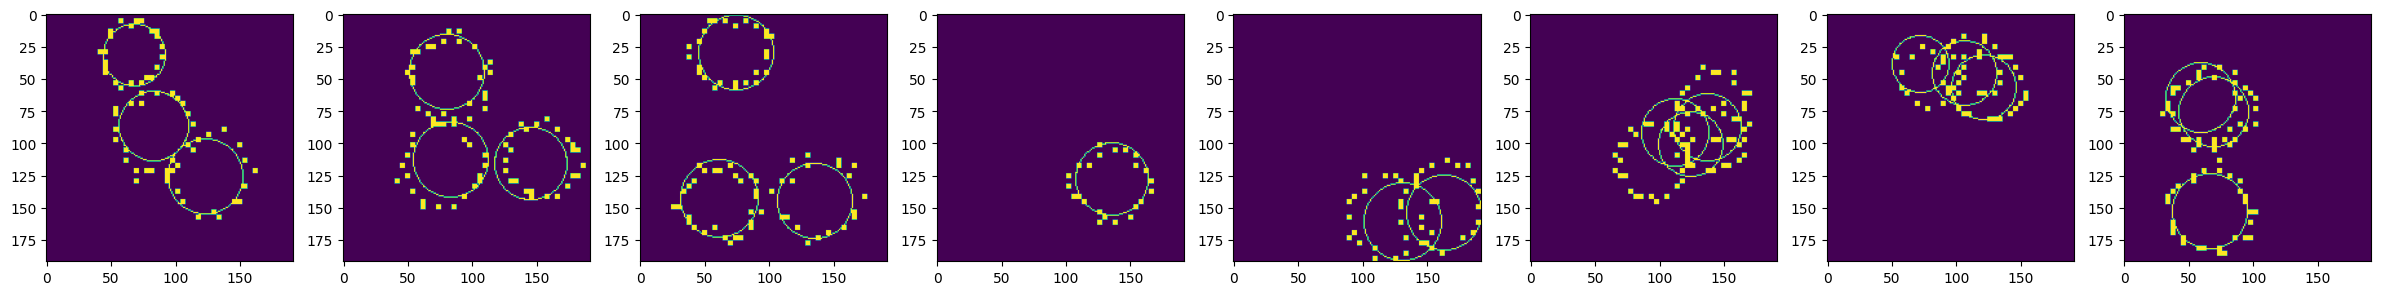

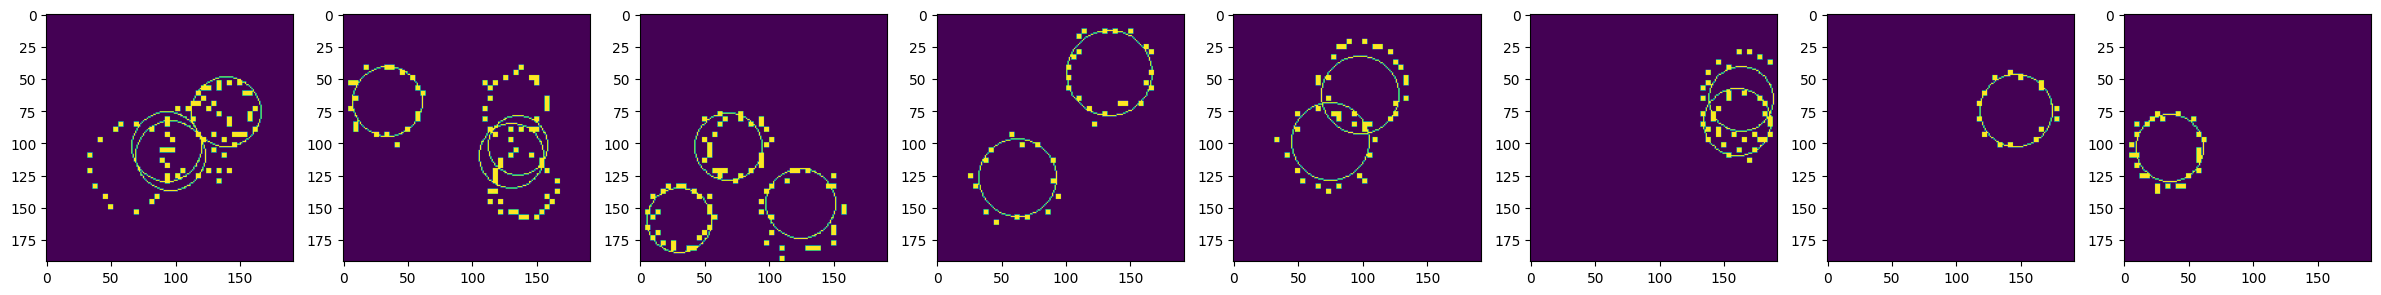

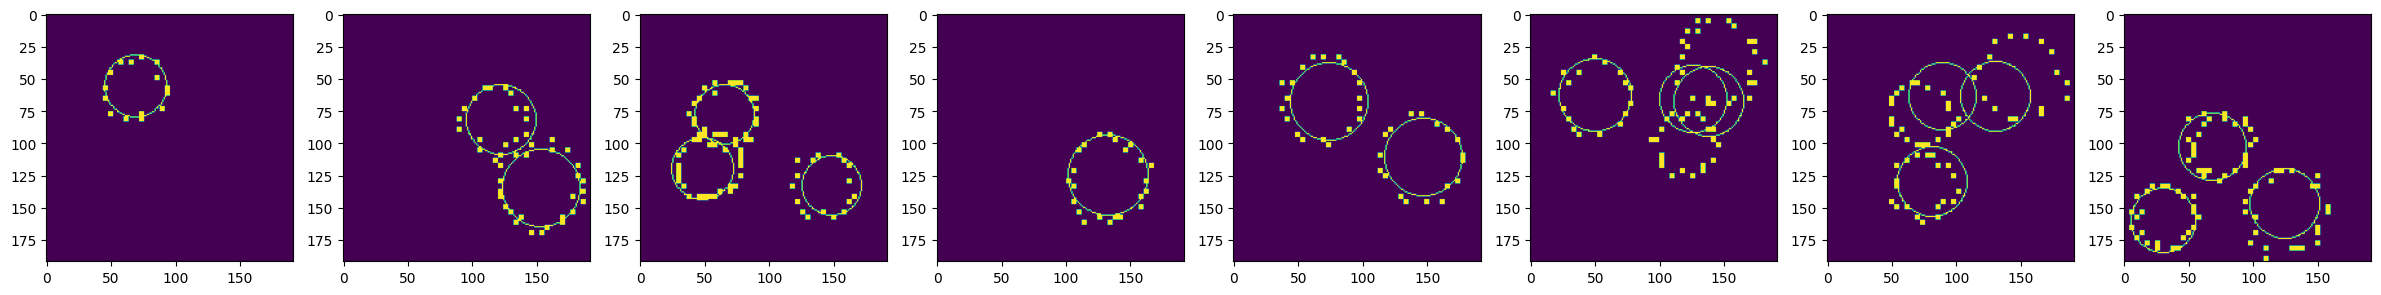

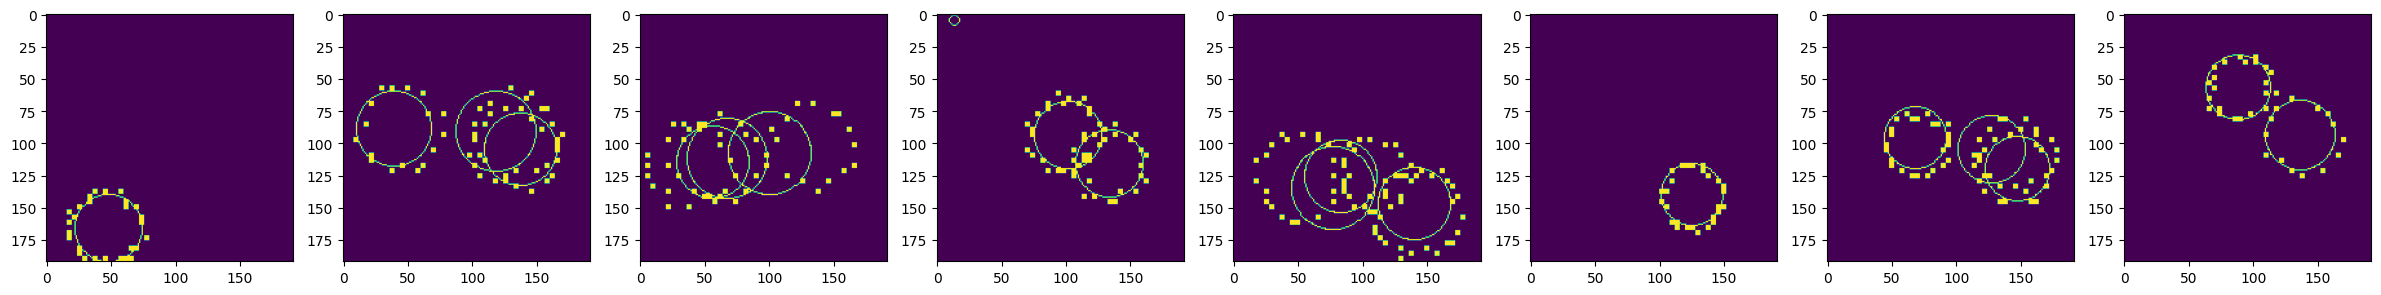

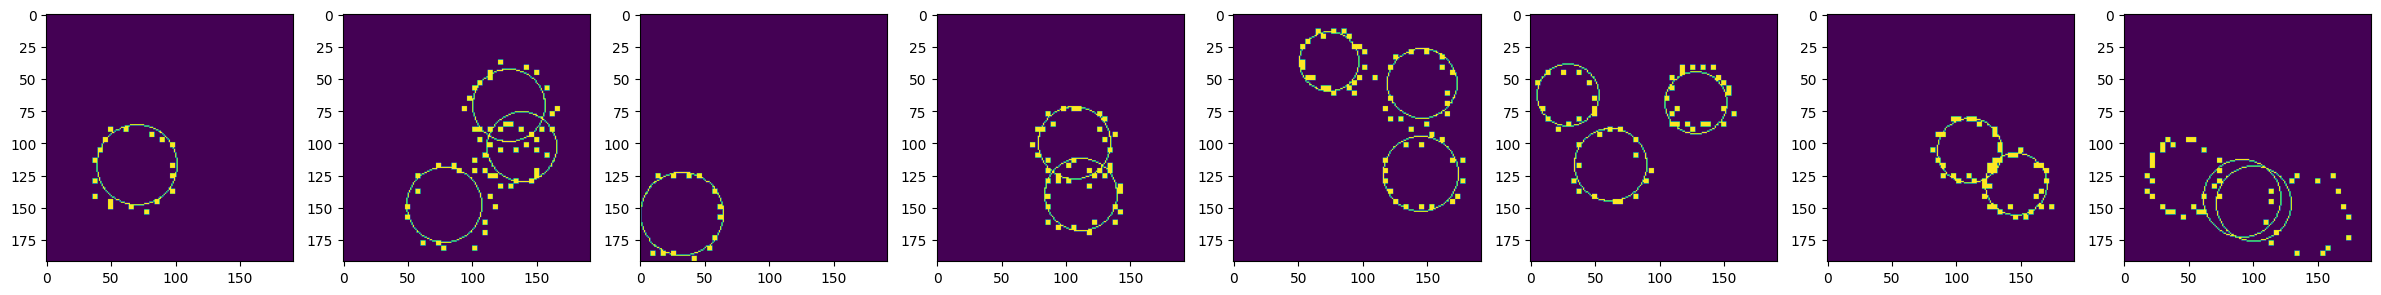

In [2]:
model = tf.keras.models.load_model("models/64x2-CNN.model")
for i in range(10):
    compare_true_and_predict(displays_test, params_test, model, i, show_true=False)

# Adding noise (48x48px)

[39.5 35.5  6.   6.   0.  21.5 35.5  6.   6.   0.   0.   0.   0.   0.
  0. ]


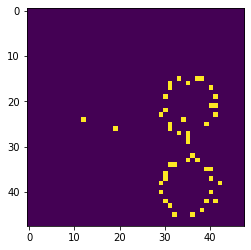

[27.5  8.5  7.   7.   0.  16.5 37.5  8.   8.   0.   0.   0.   0.   0.
  0. ]


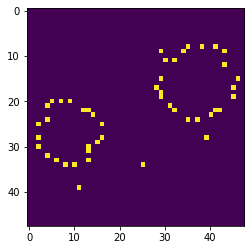

[35.5  7.5  6.   6.   0.  32.5 37.5  6.   6.   0.   0.   0.   0.   0.
  0. ]


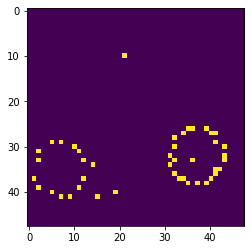

In [3]:
for i in range(3):
    print(params[i])
    plt.imshow(displays[i])
    plt.show()

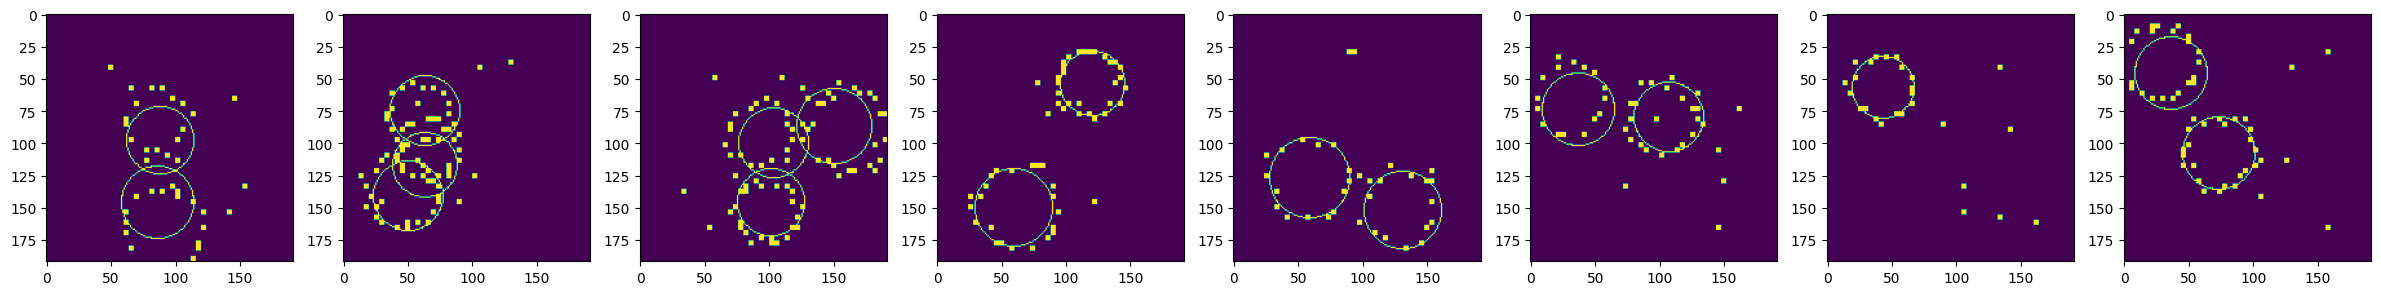

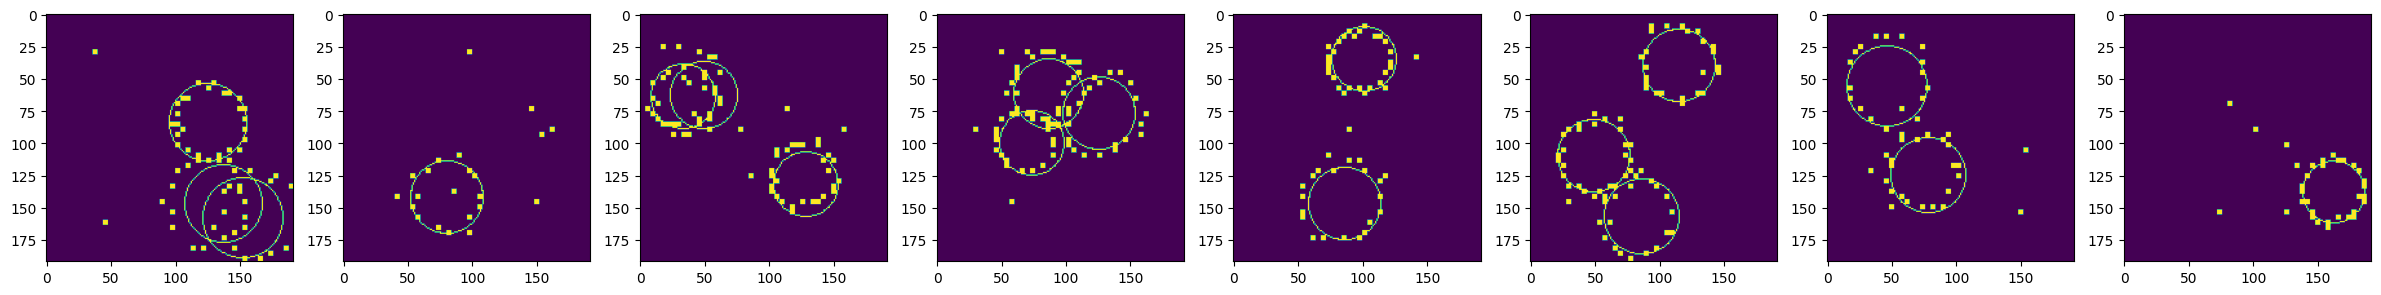

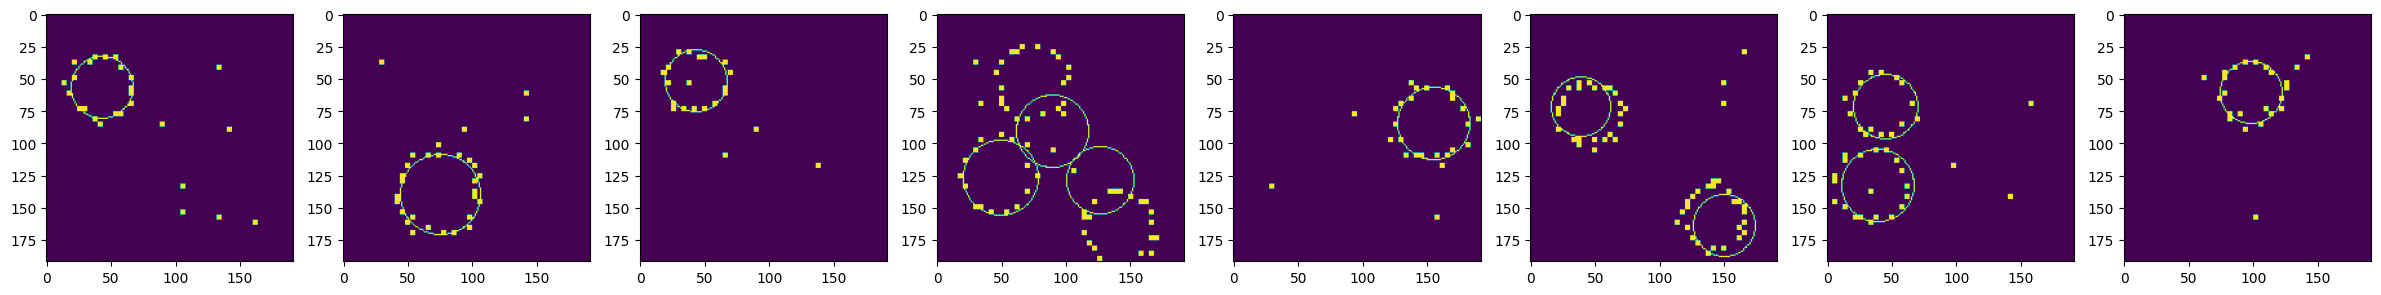

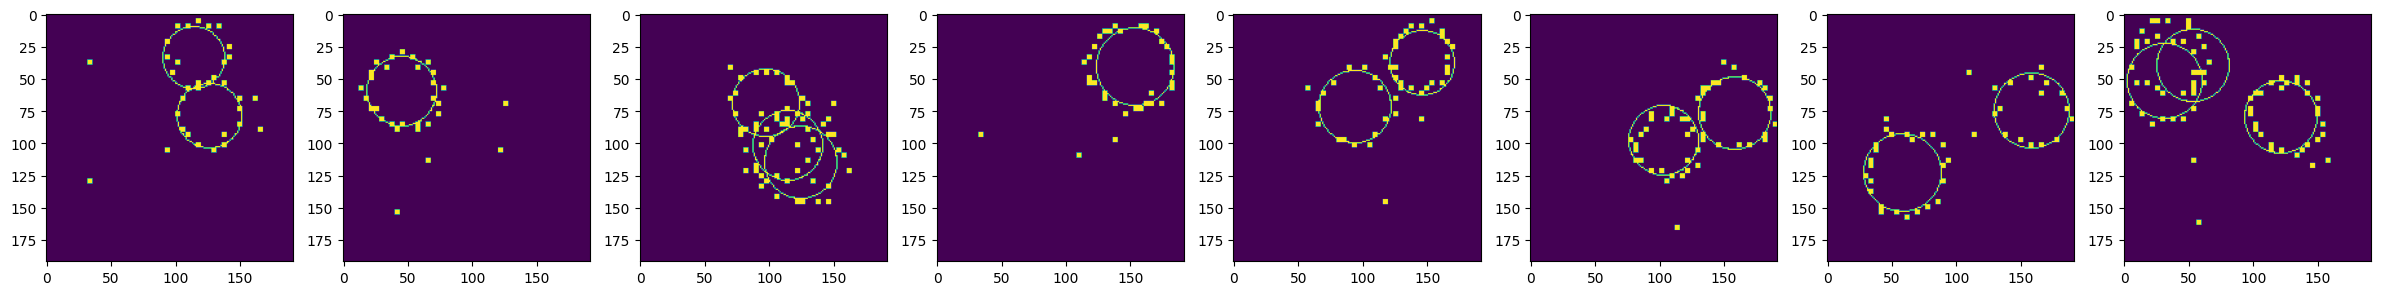

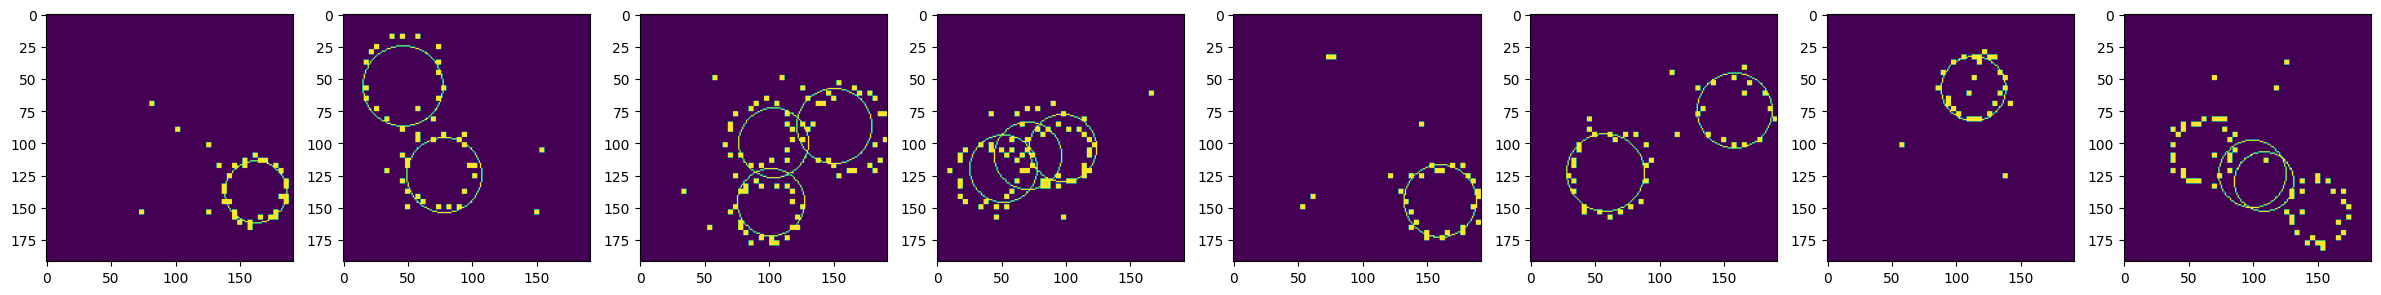

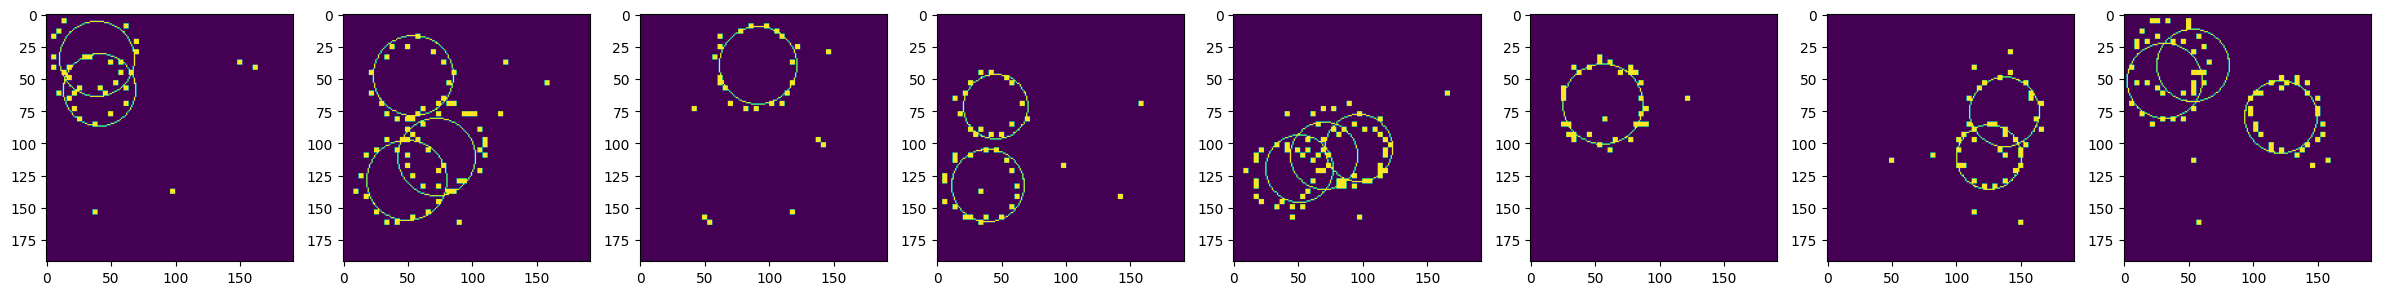

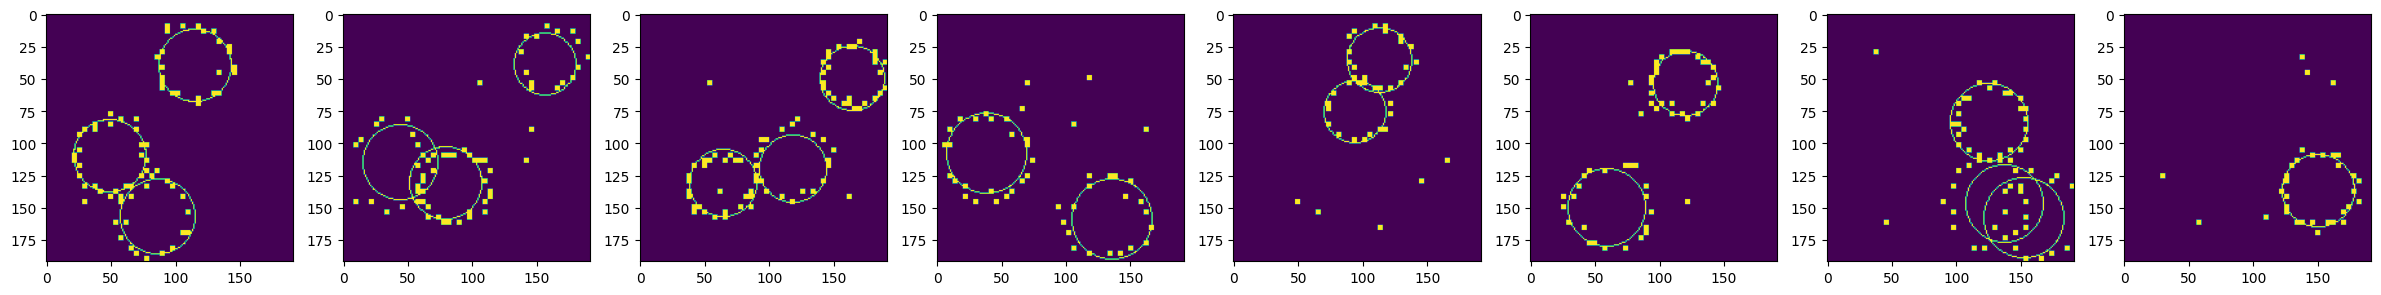

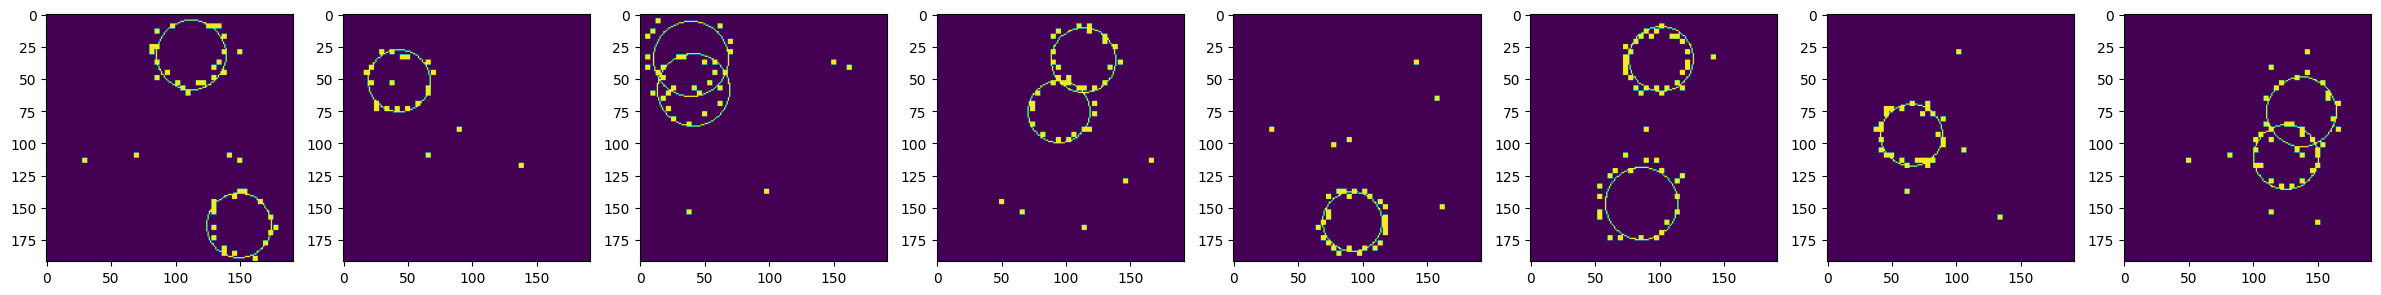

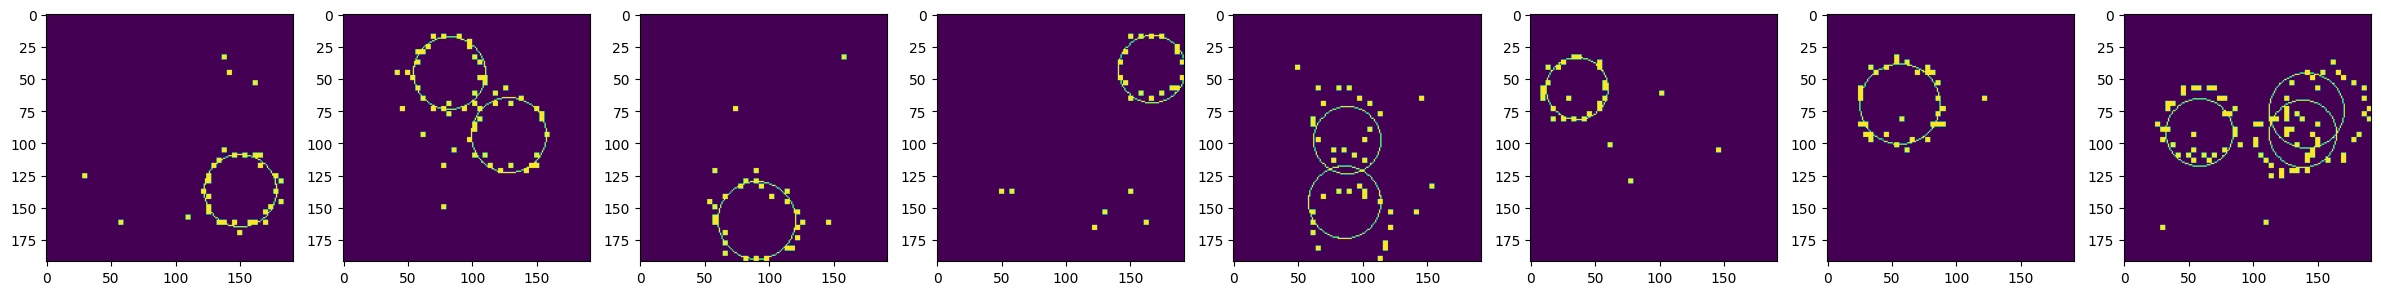

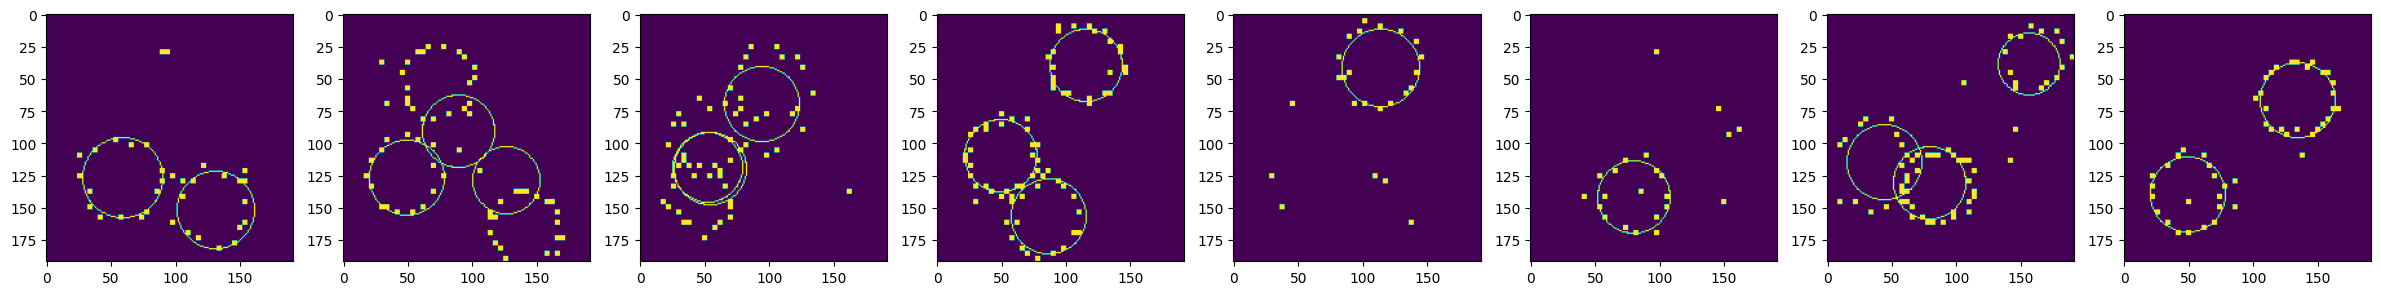

In [2]:
model = tf.keras.models.load_model("models/32x2-CNN.model")
for i in range(10):
    compare_true_and_predict(displays_test, params_test, model, i, show_true=False)

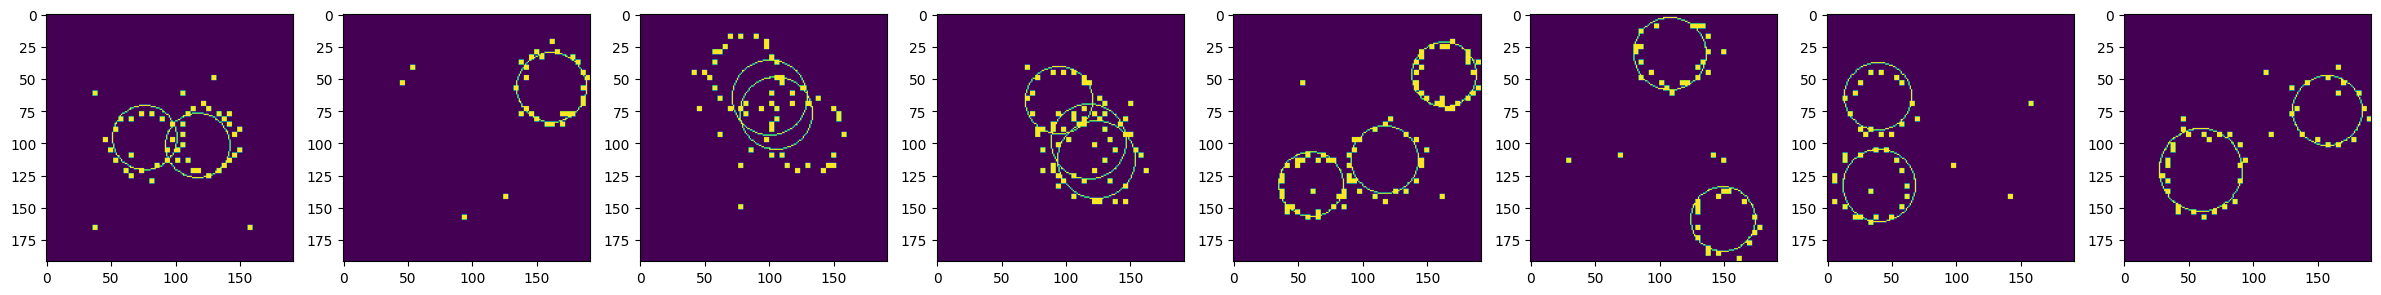

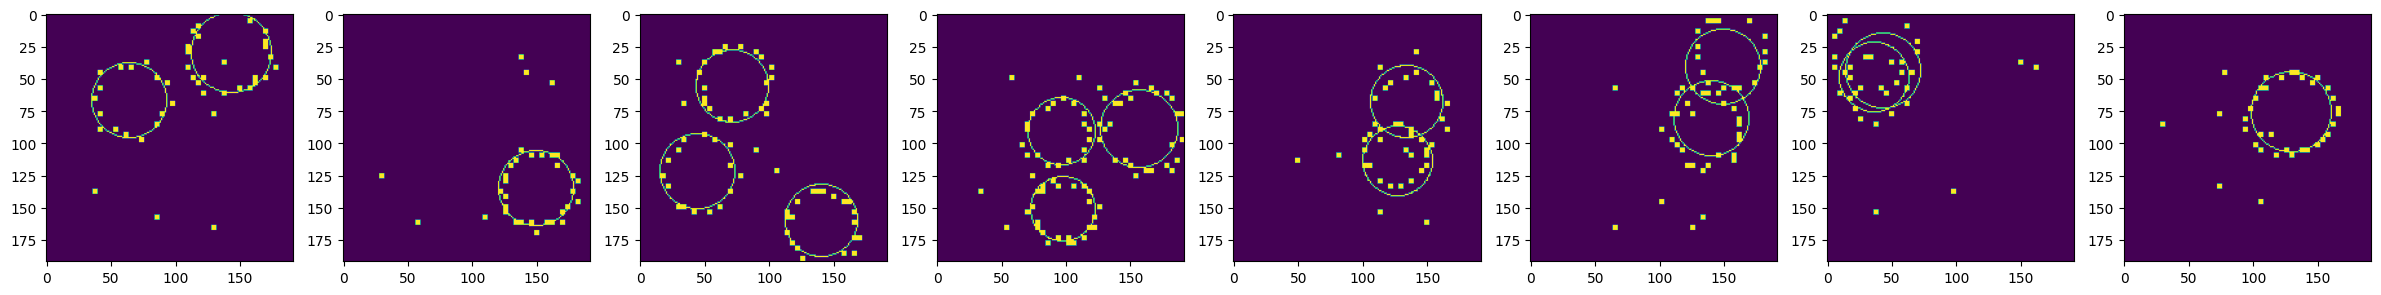

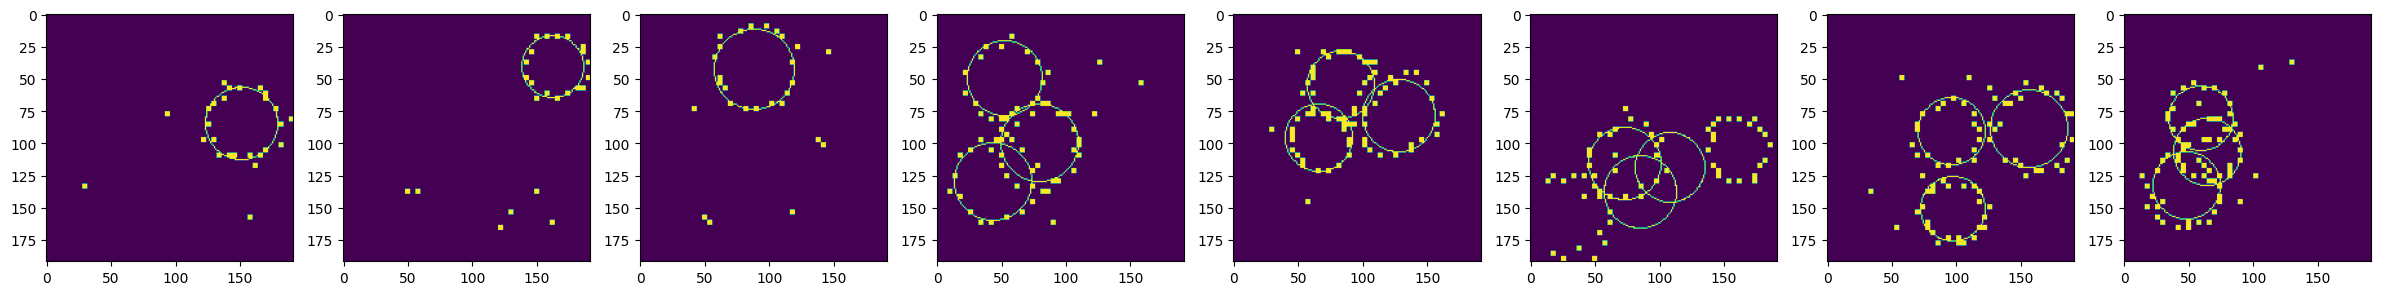

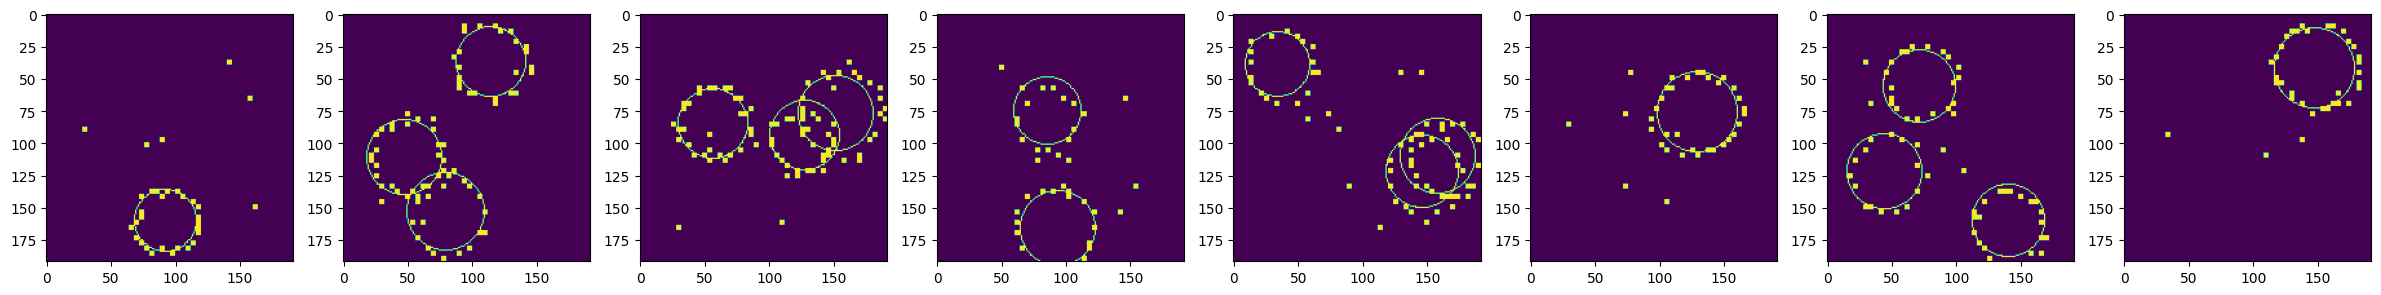

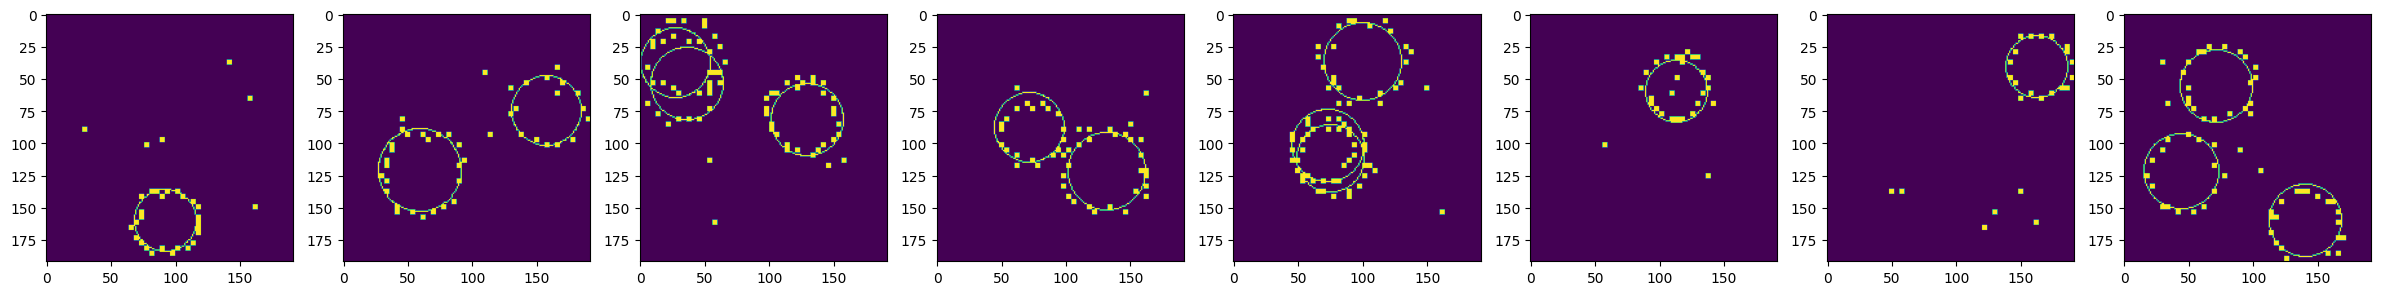

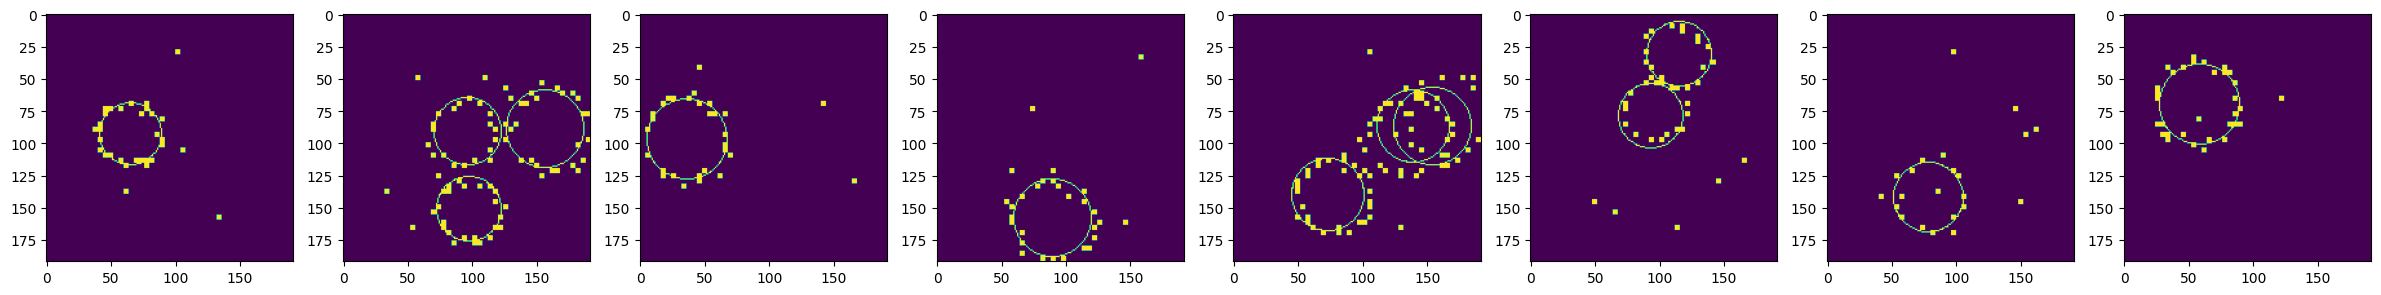

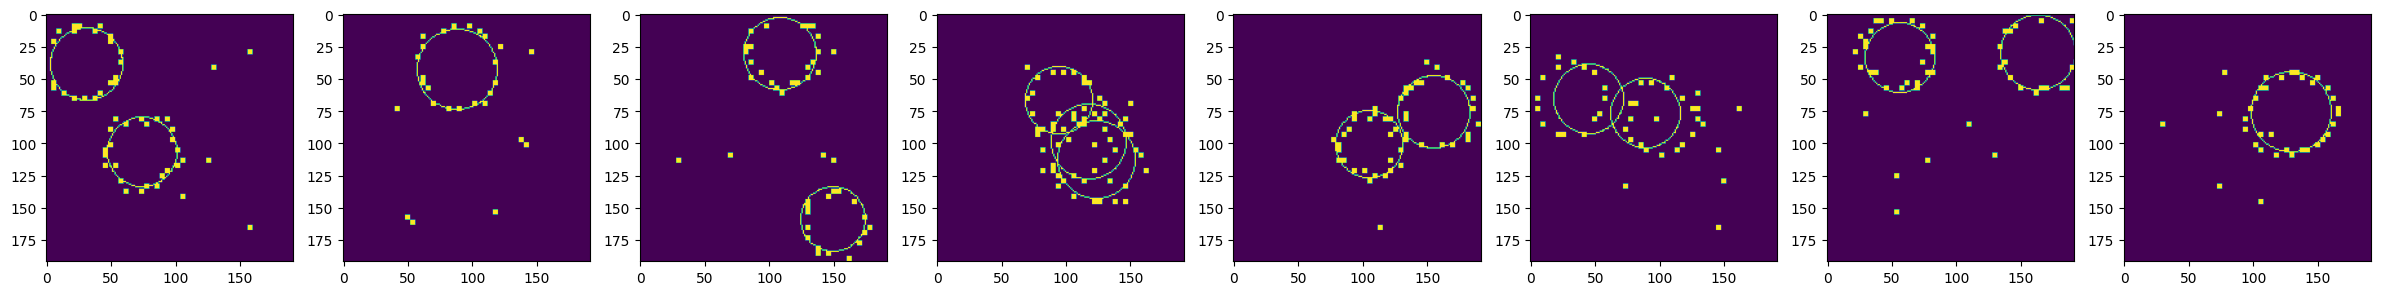

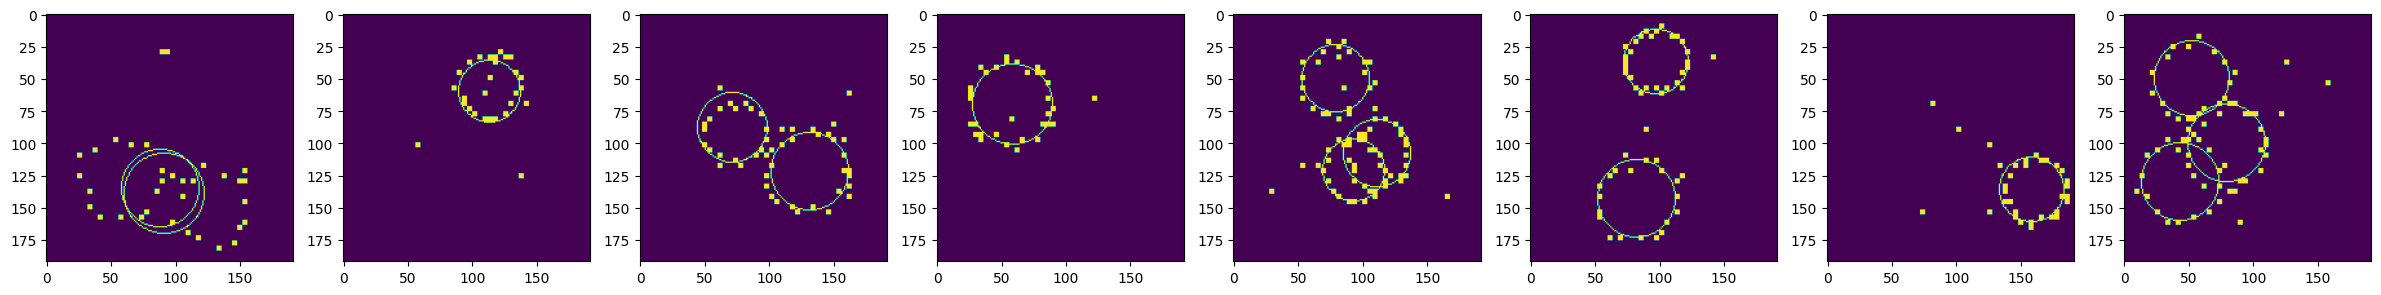

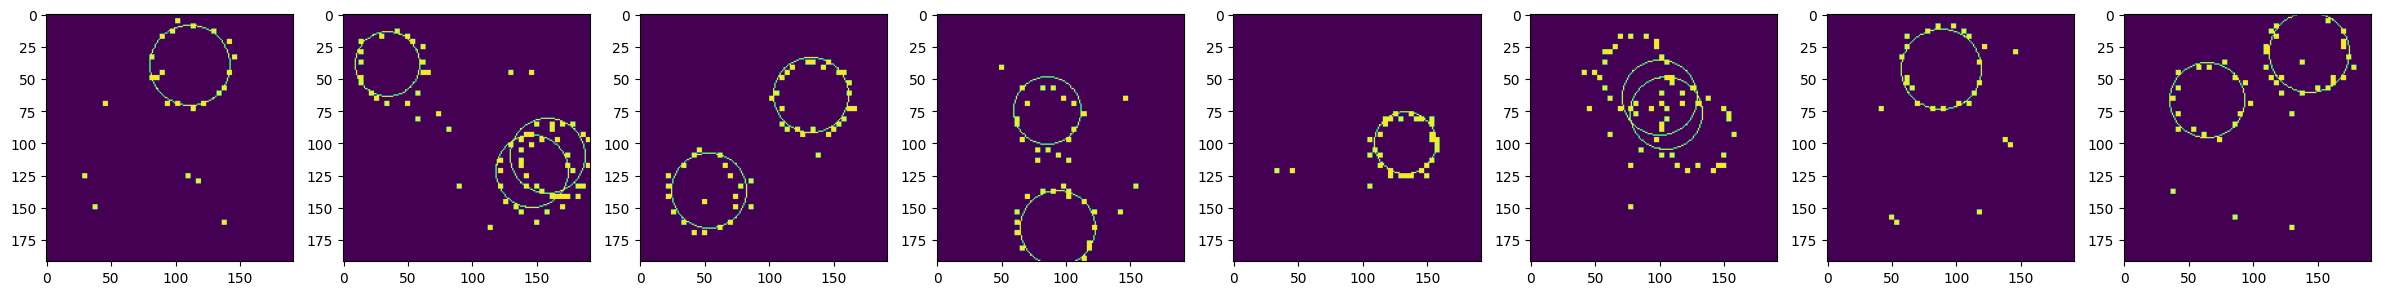

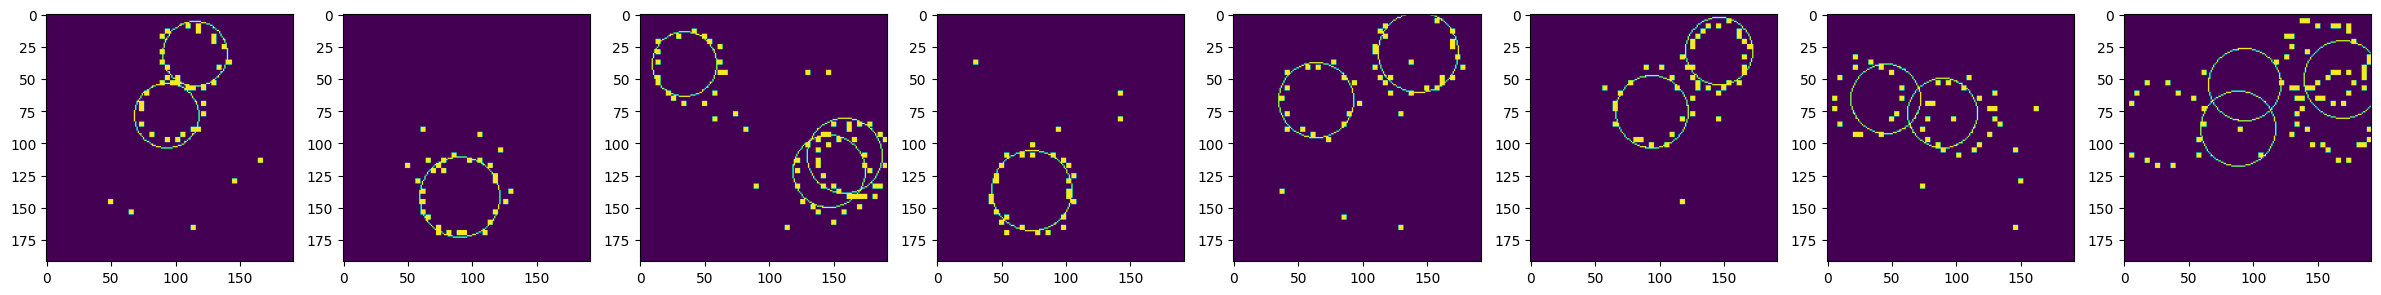

In [2]:
model = tf.keras.models.load_model("models/64x4-CNN.model")
for i in range(10):
    compare_true_and_predict(displays_test, params_test, model, i, show_true=False)

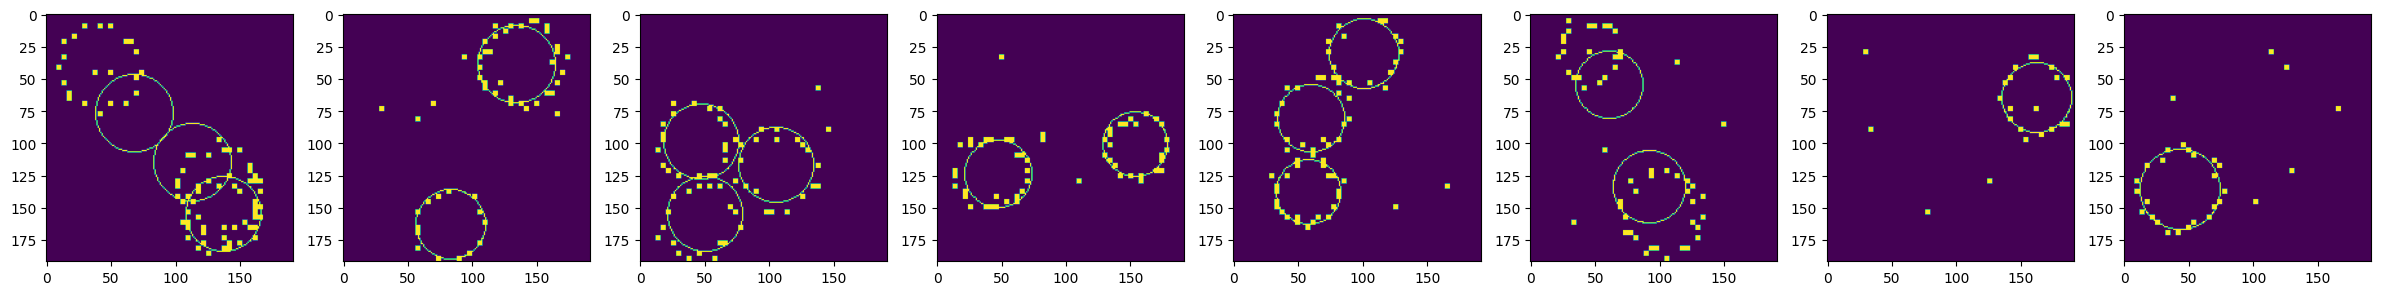

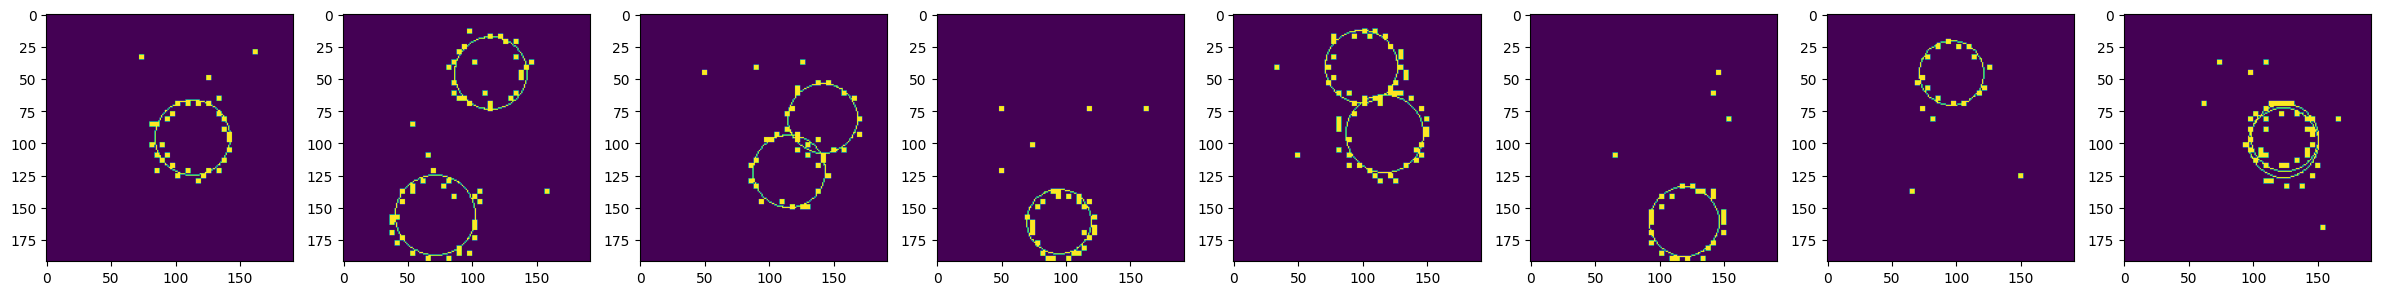

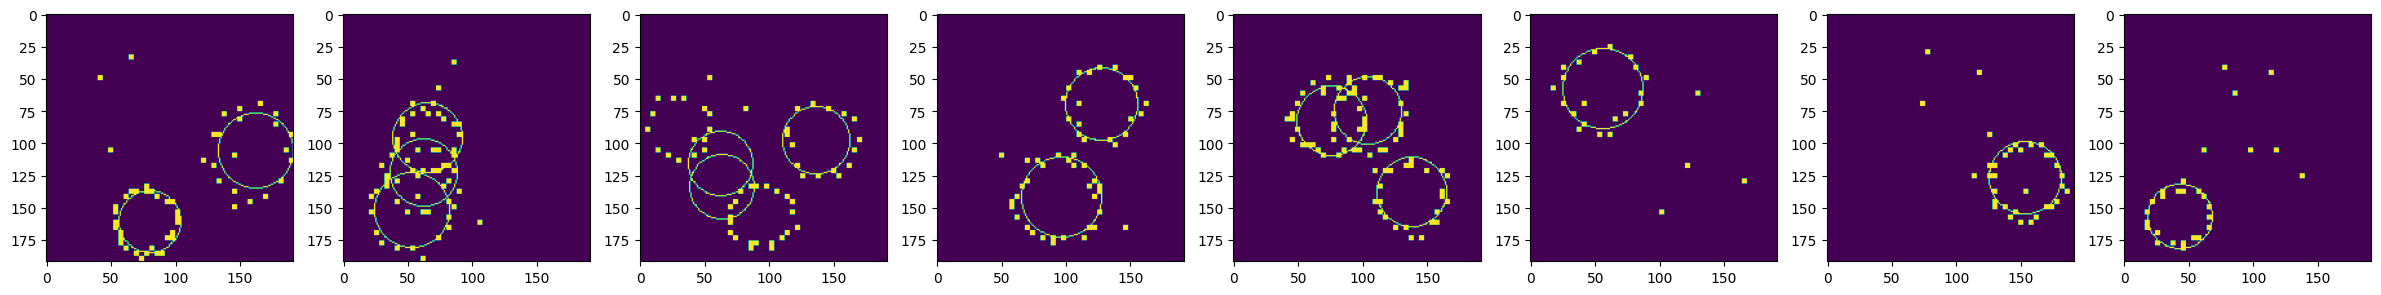

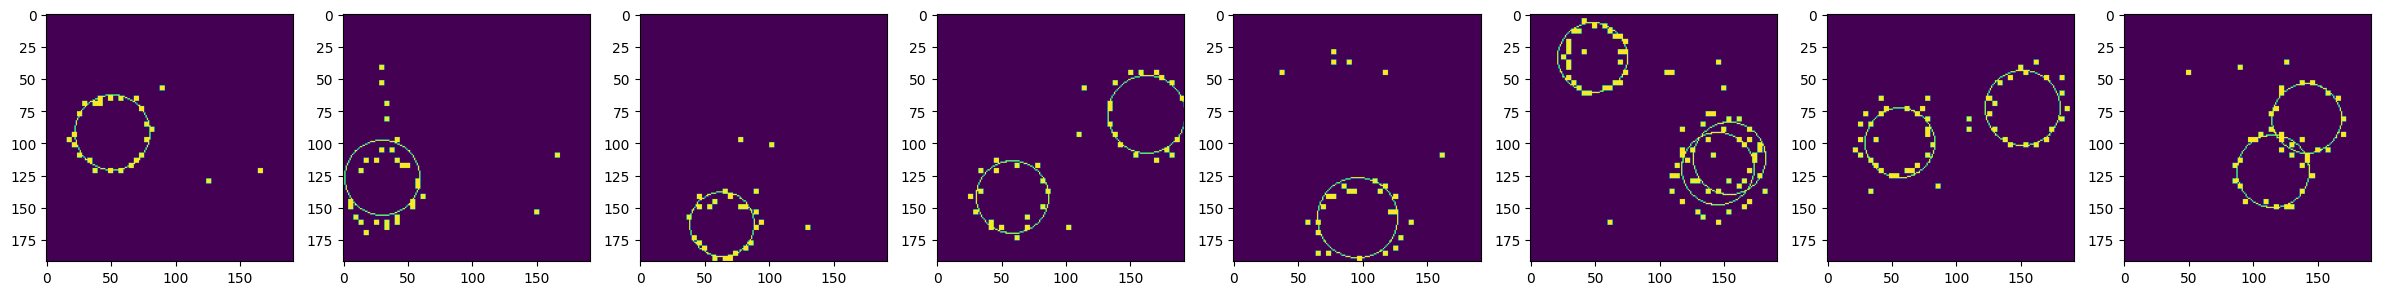

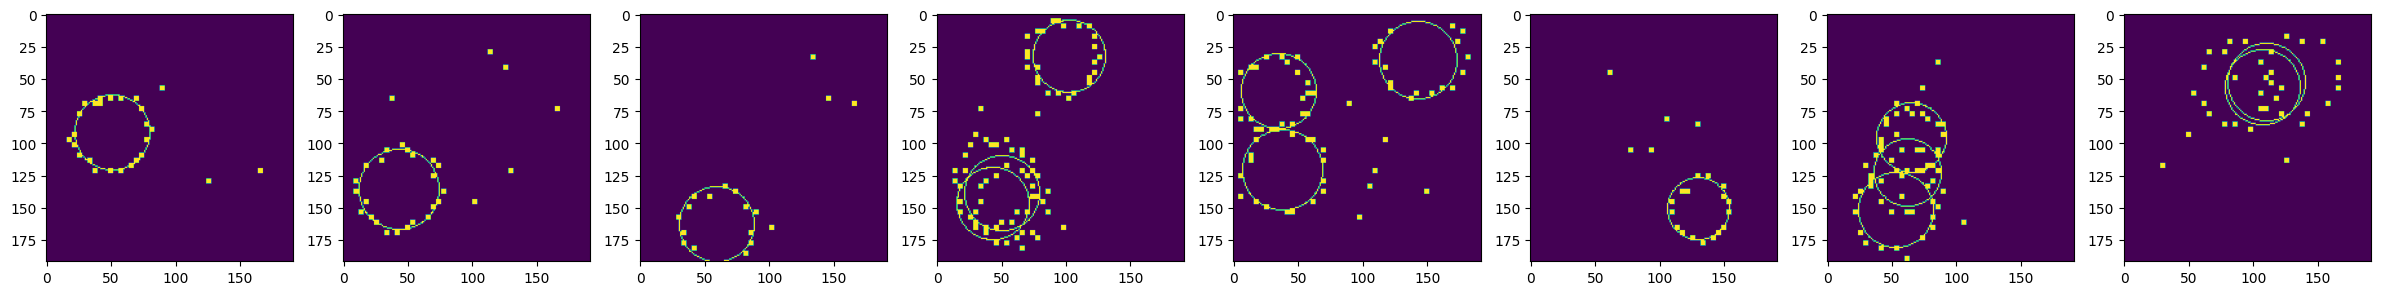

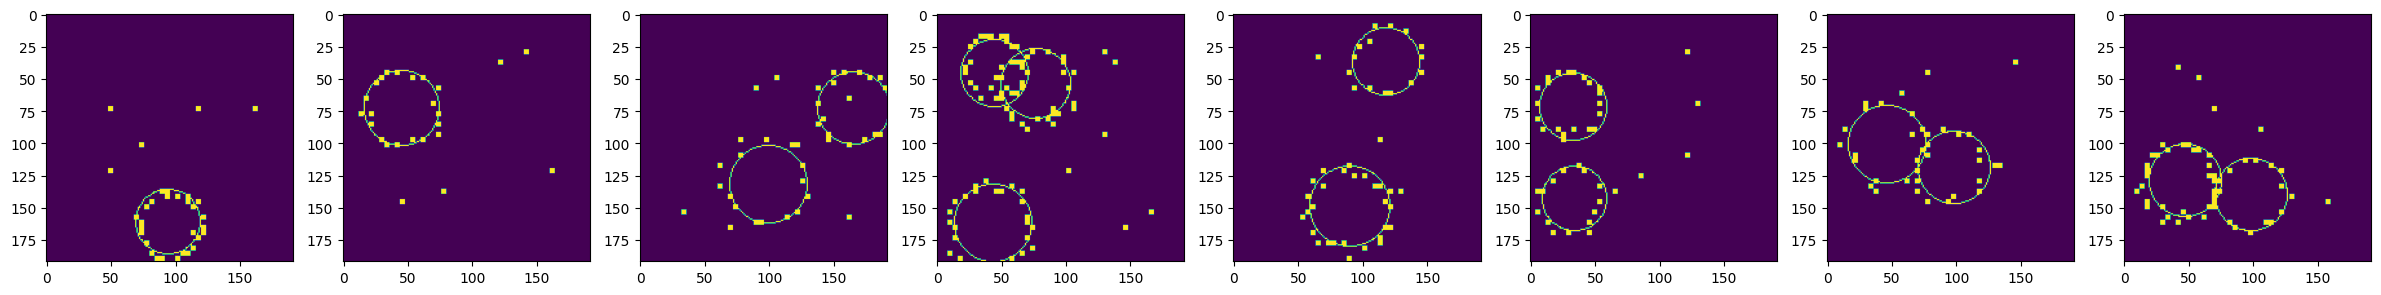

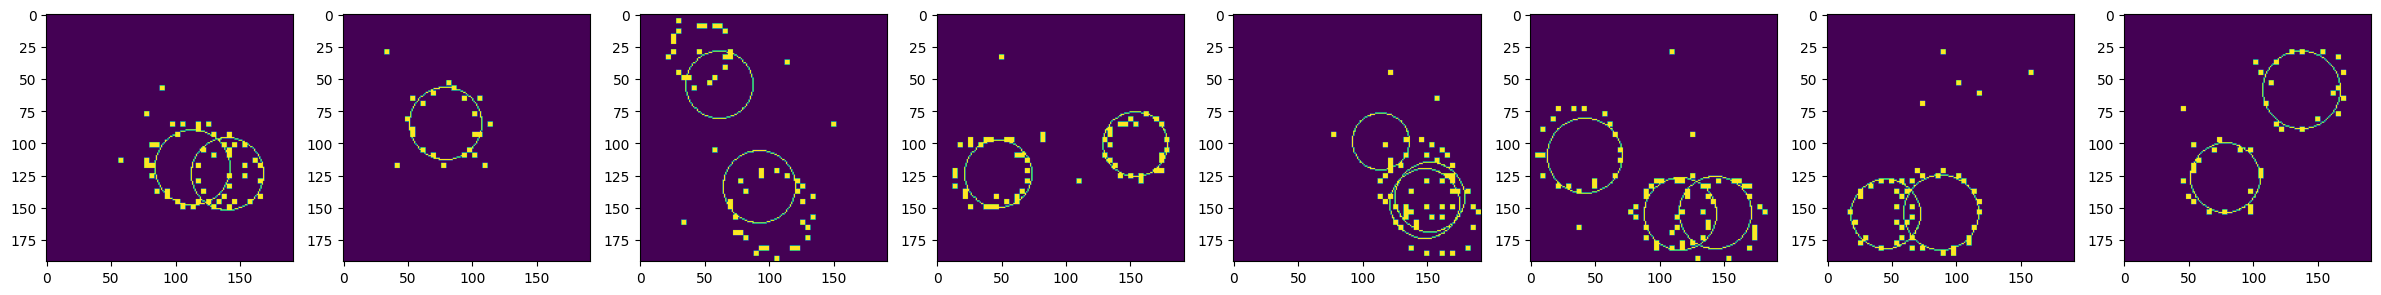

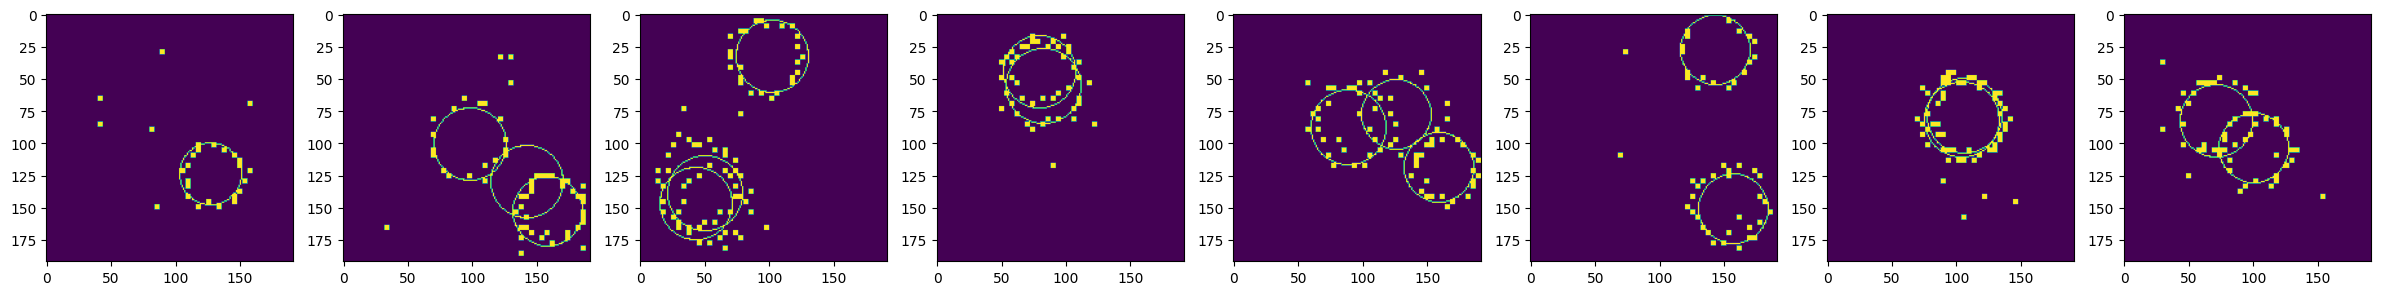

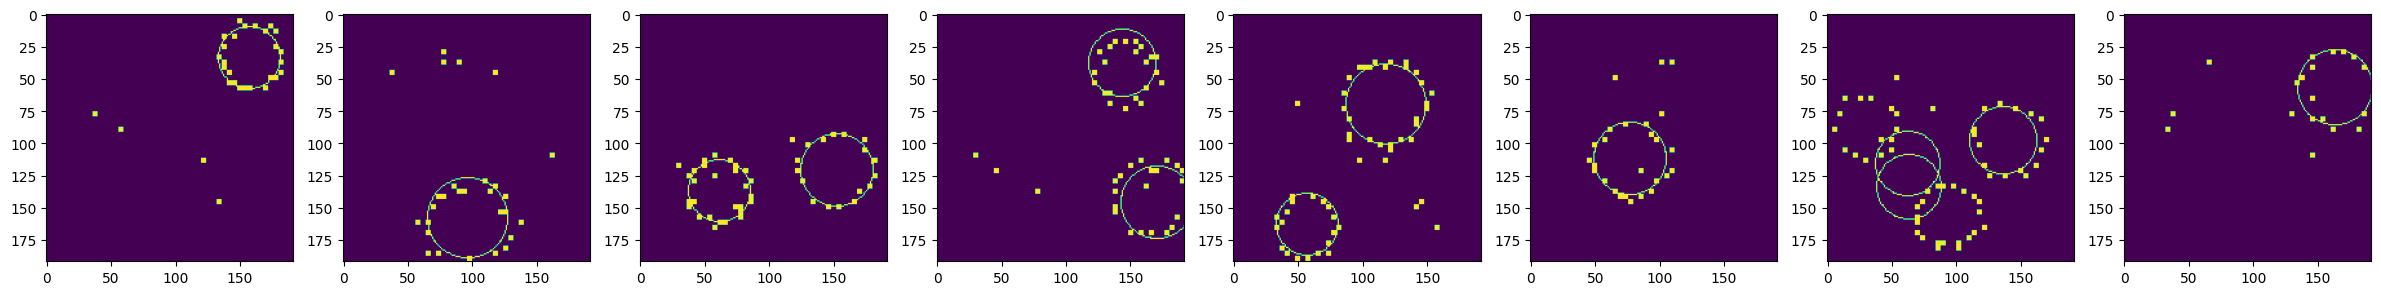

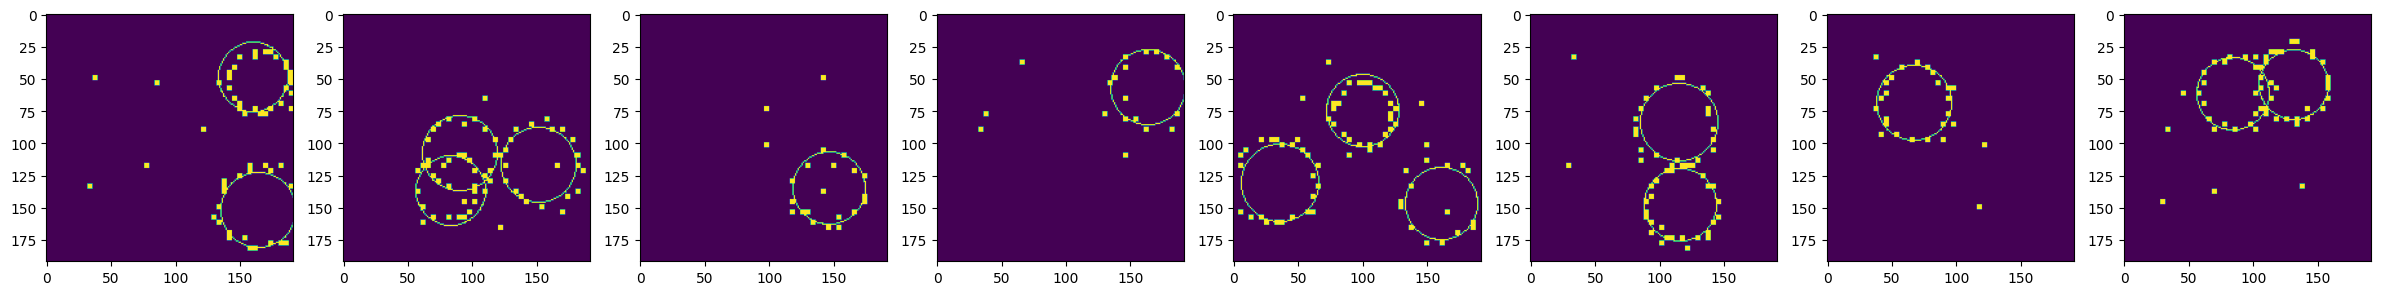

In [2]:
model = tf.keras.models.load_model("models/128x4-CNN.model")
for i in range(10):
    compare_true_and_predict(displays_test, params_test, model, i, show_true=False)

## Best model so far (val_accuracy=0.946)

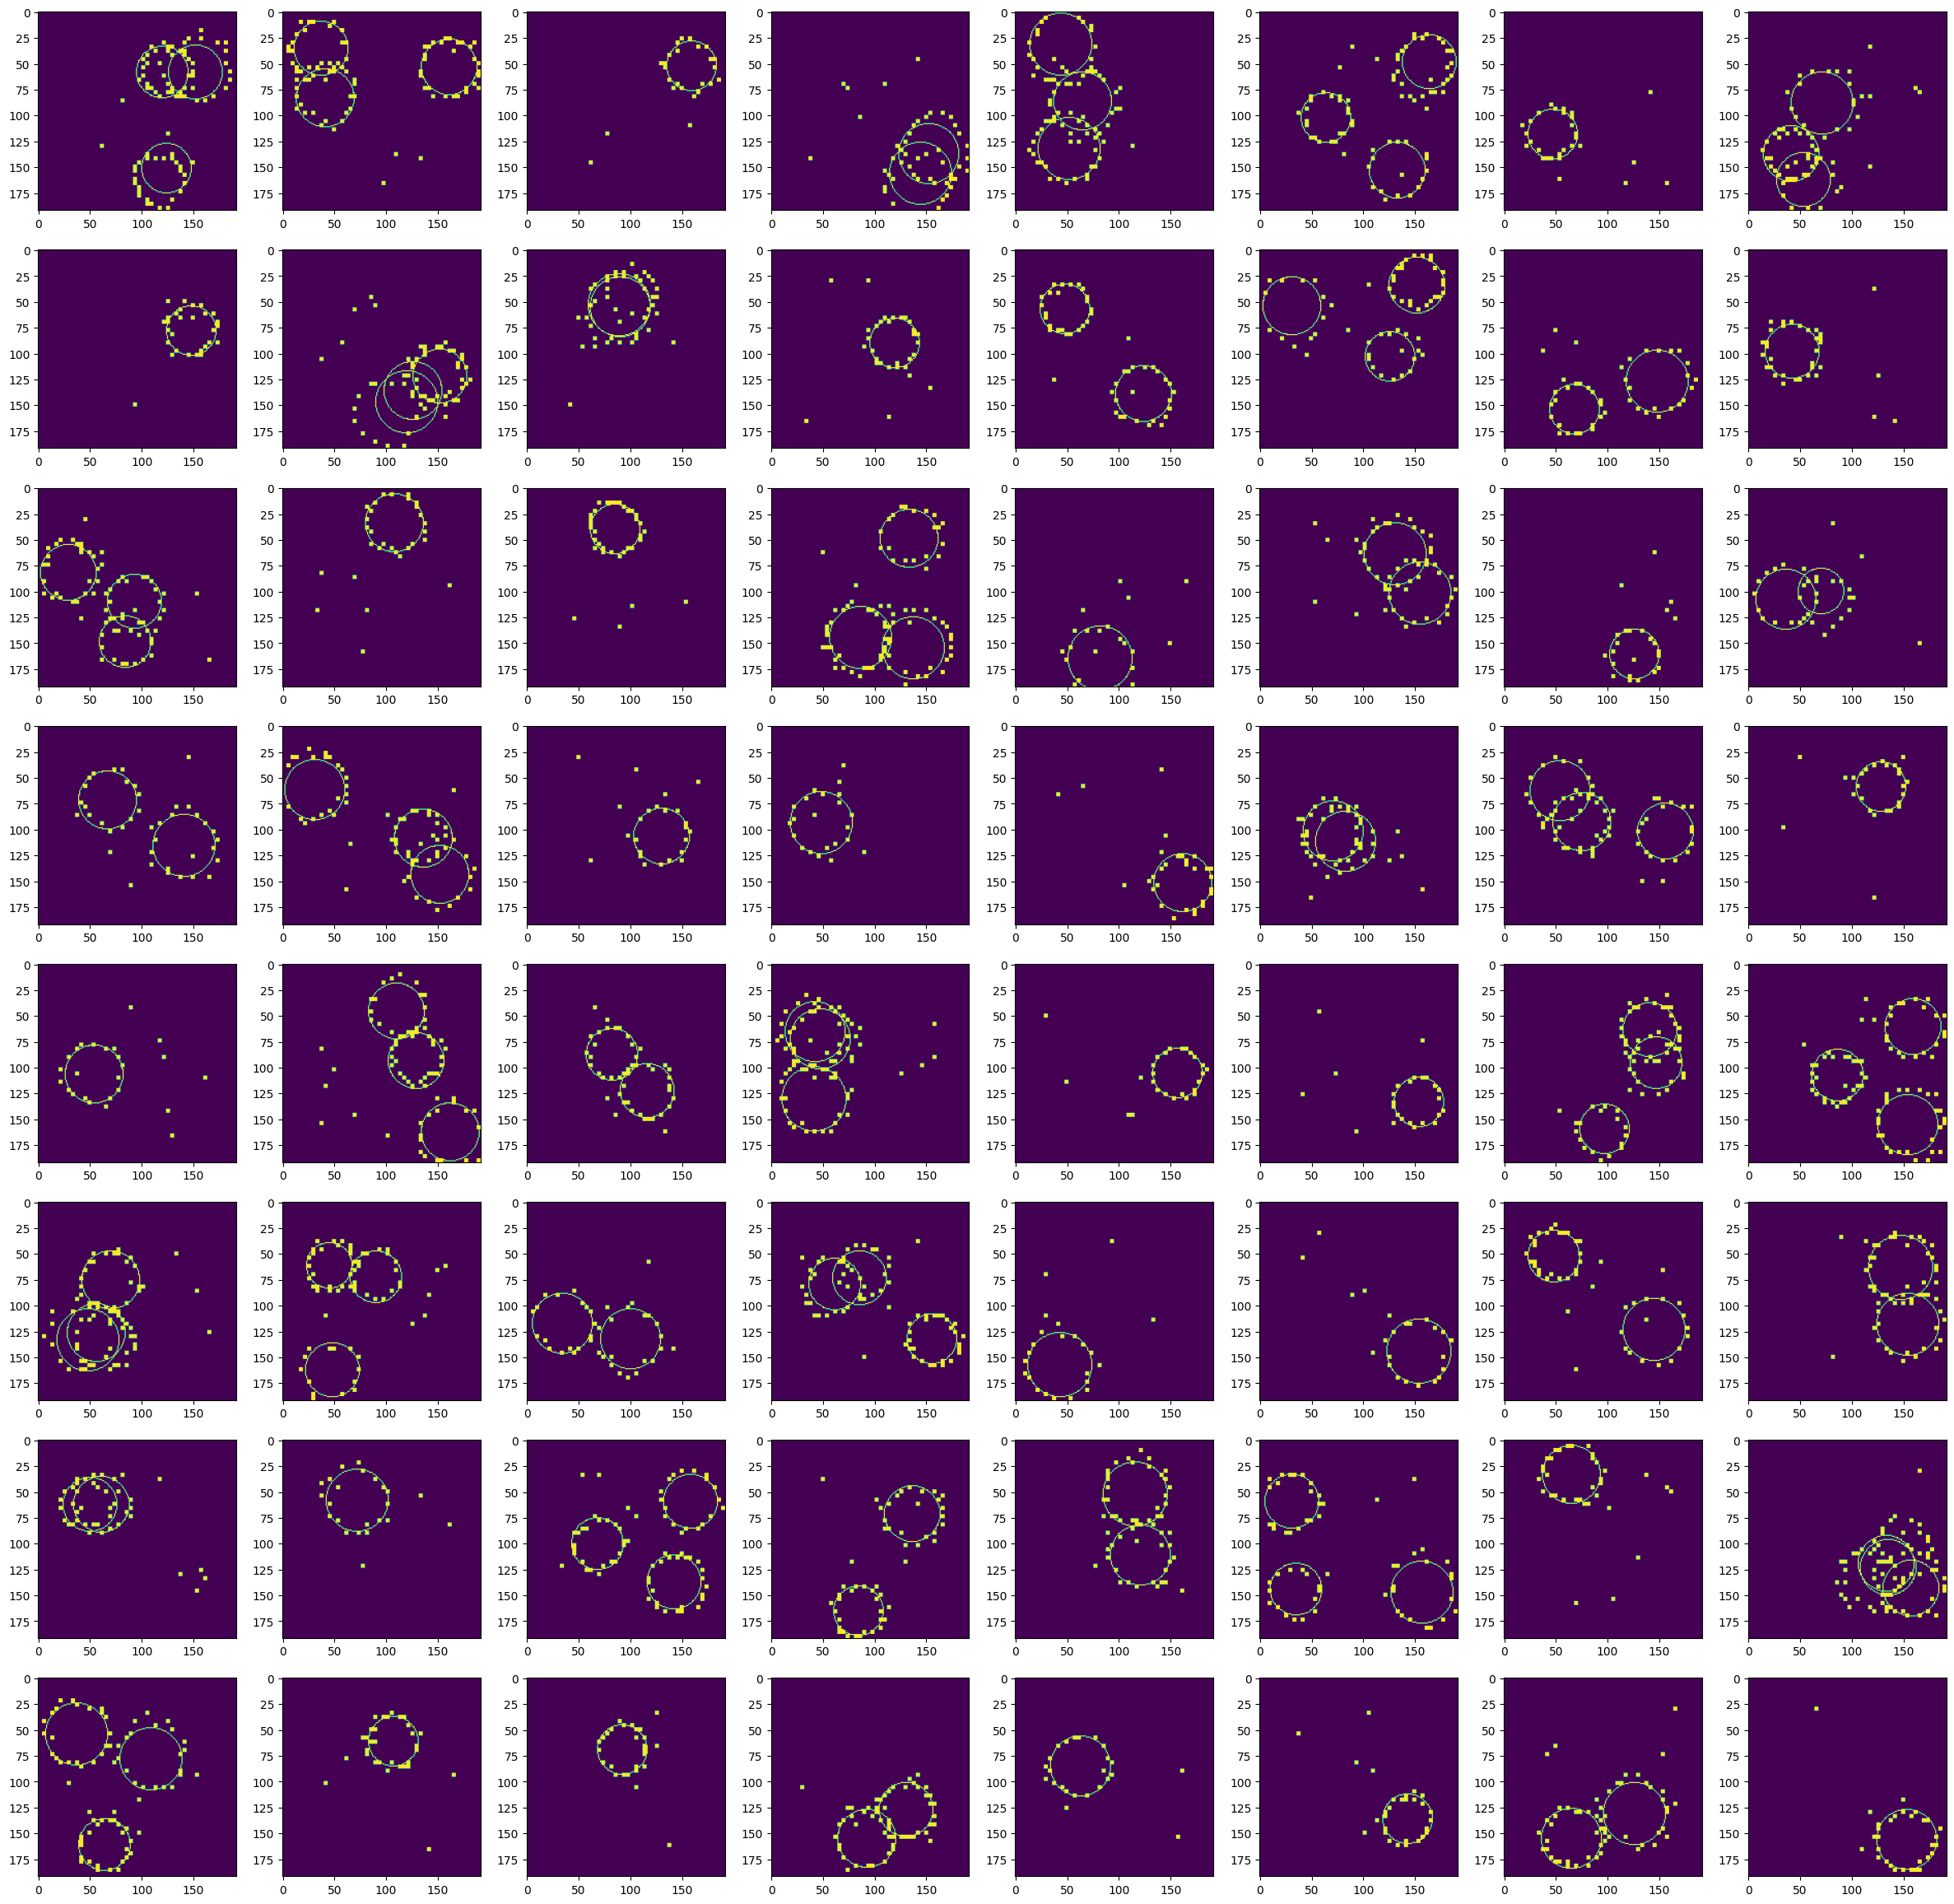

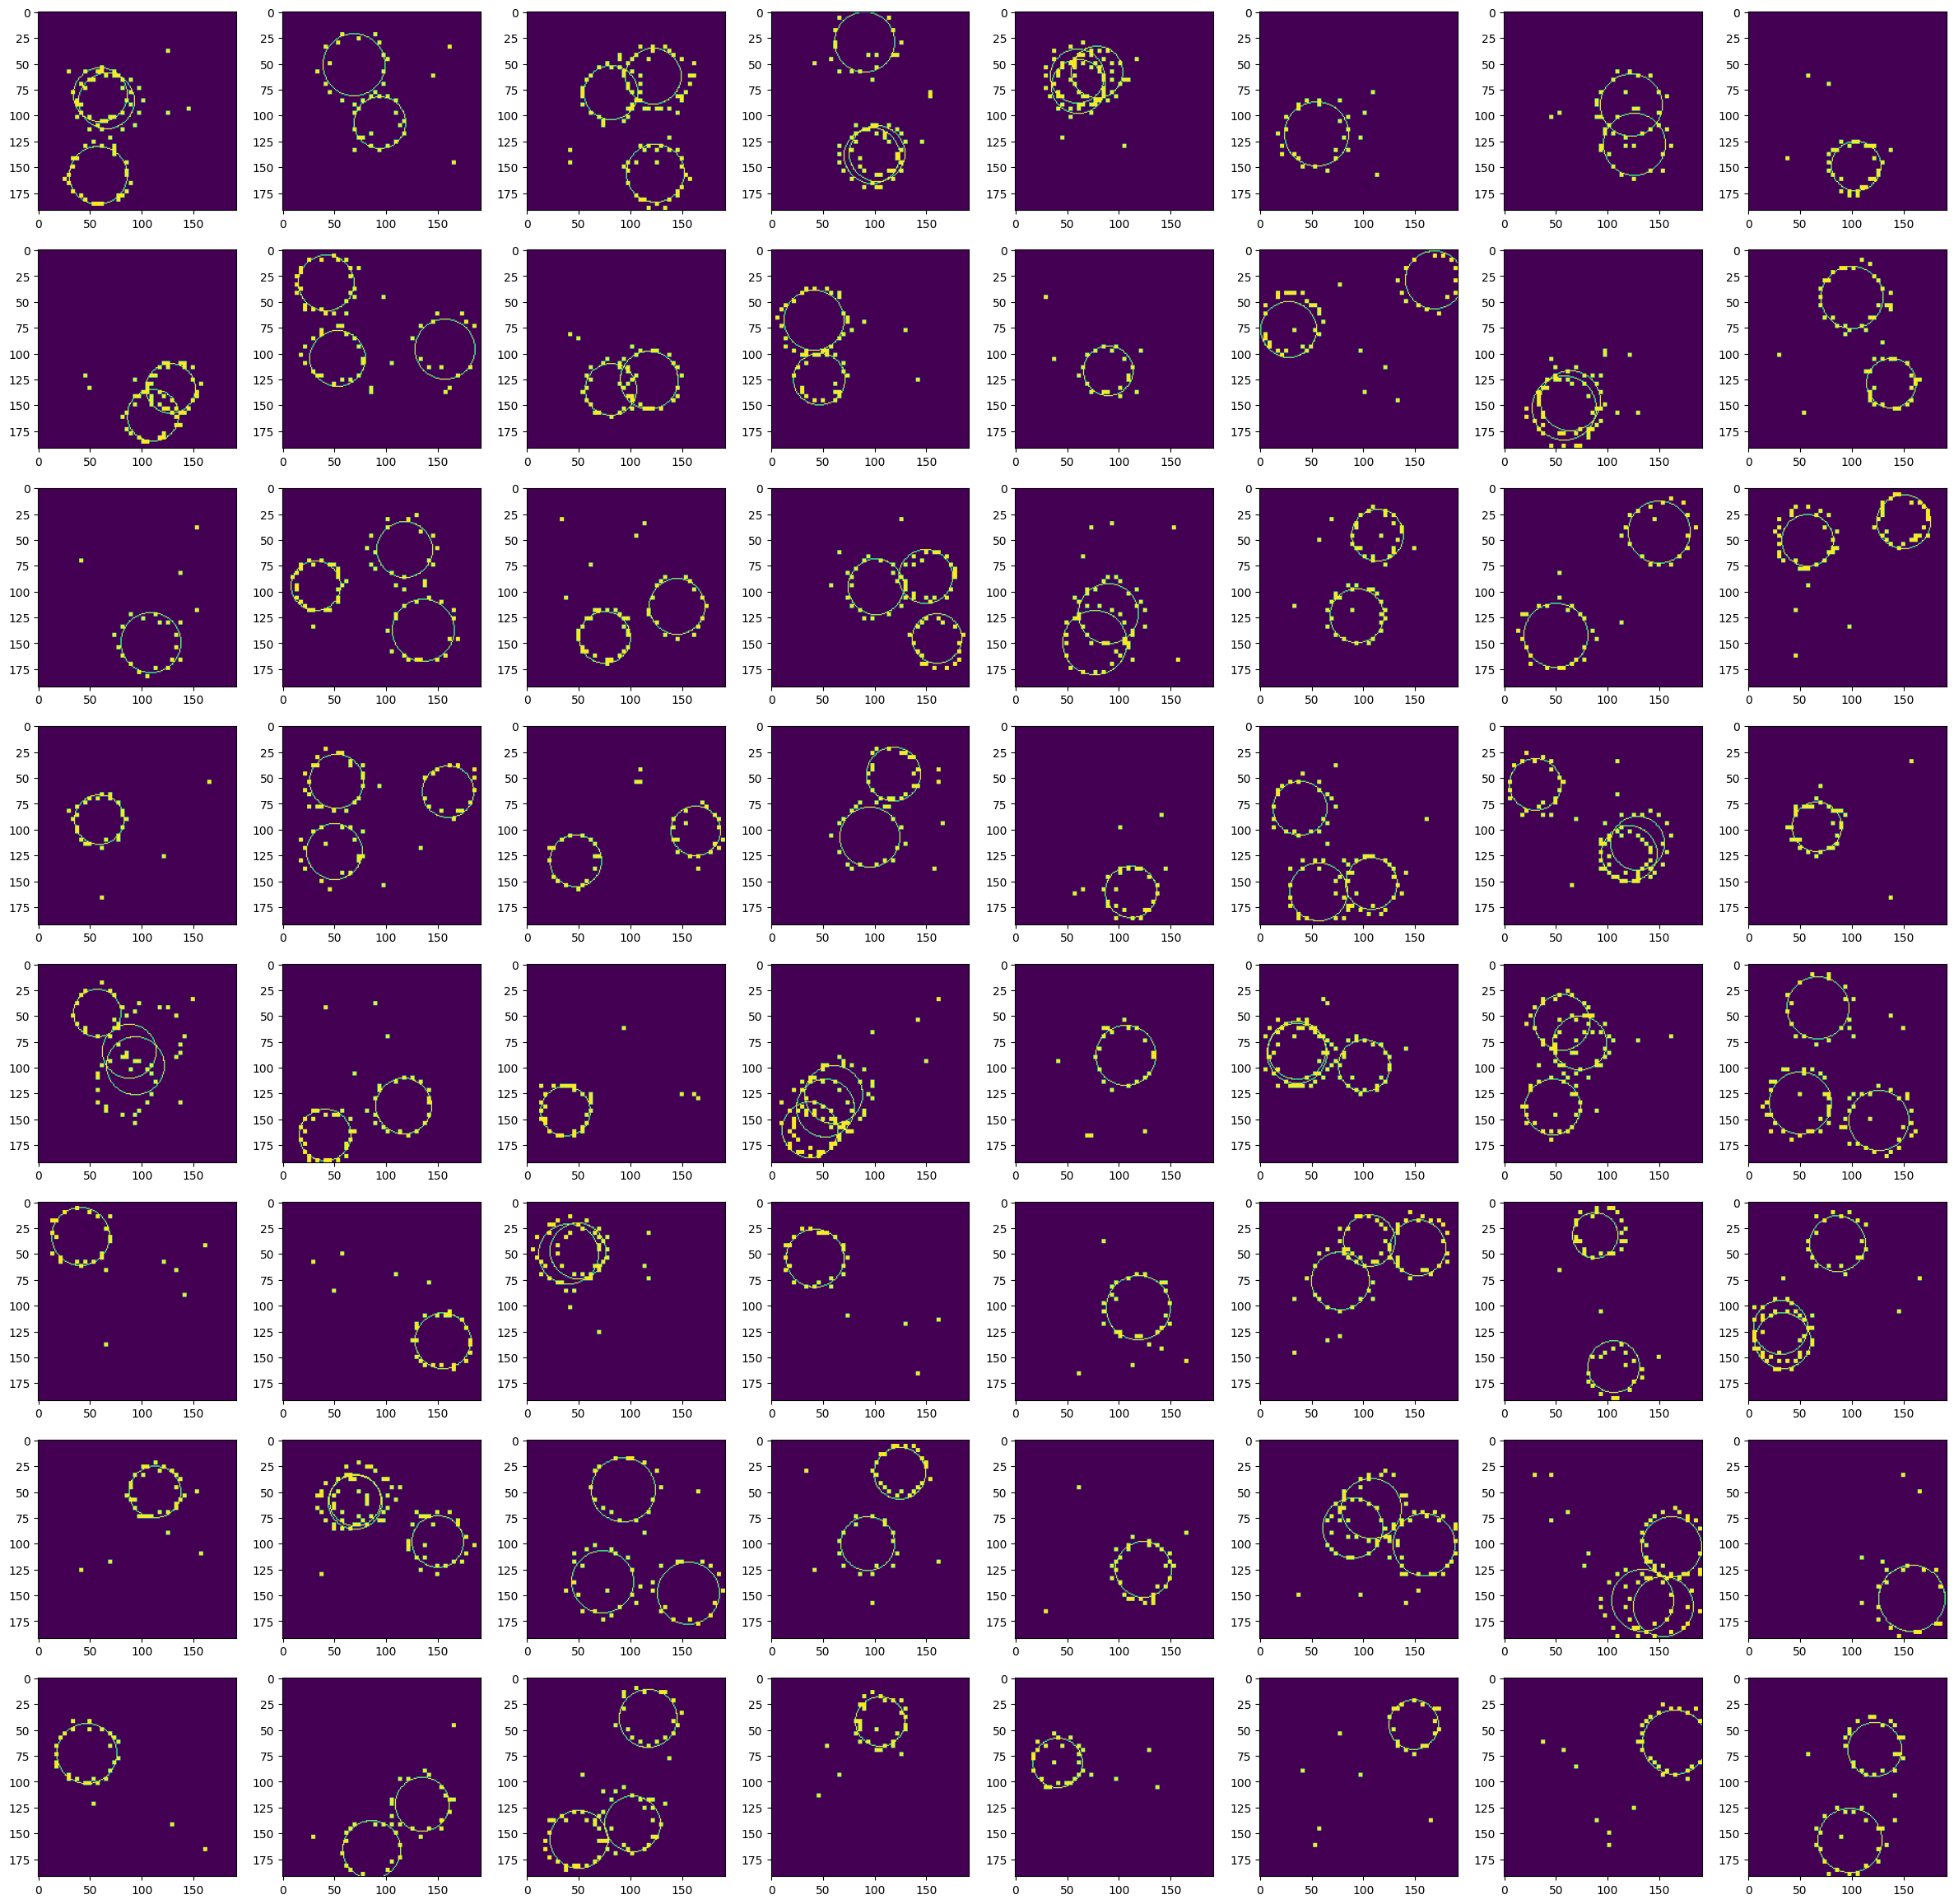

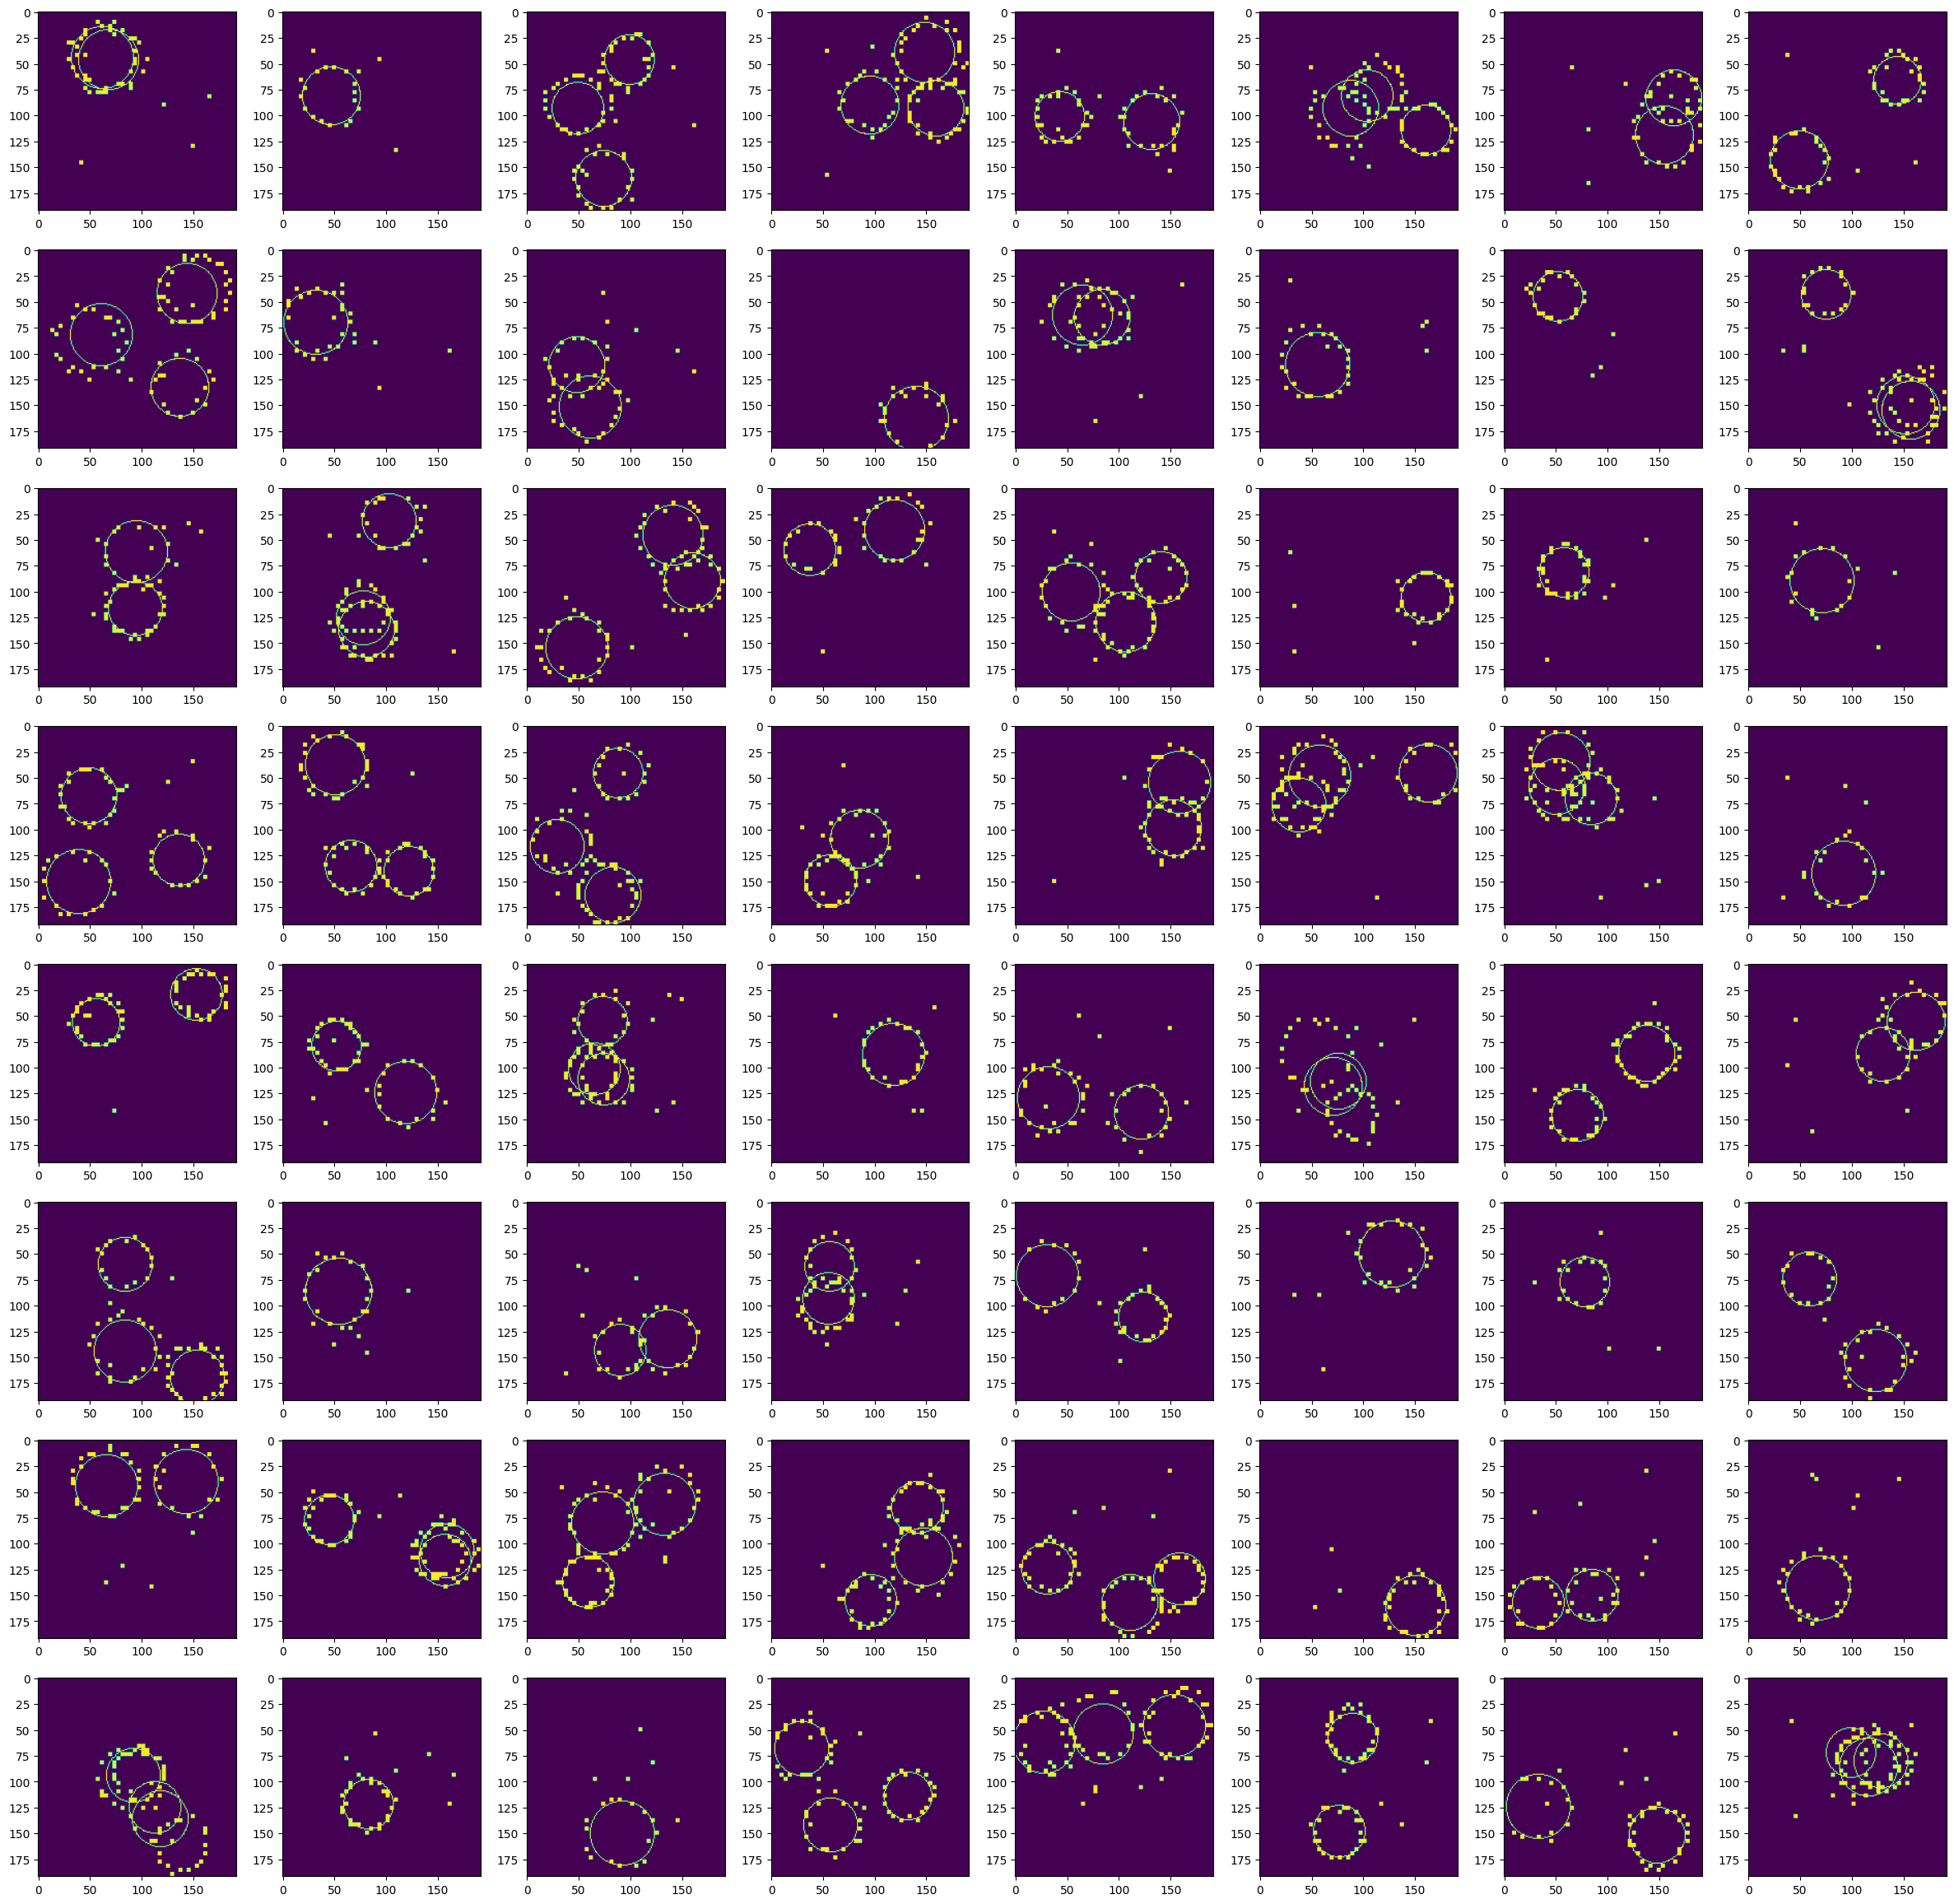

In [2]:
model = tf.keras.models.load_model("models/256x4-CNN.model")
#save_pred_imgs(displays_test, params_test, model)
for i in range(3):
    show_predict(displays_test, params_test, model, i, "fig{}".format(i))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        1600      
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        100416    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0

### Time for predicting 1000 events

In [6]:
from time import time
t1 = time()
model.predict(displays_test)
print(time() - t1)

0.16136741638183594
